### <font color = 'purple'> Women in Data Science Competition for 2024

Join the WiDS Datathon to hone your data science skills while solving an interesting and critical social impact challenge! Utilizing a unique oncology dataset, you will look at how climate patterns impact access to healthcare.

##### Overview: 

The Dataset and Challenge:

Gilead Sciences is the sponsor for this year’s WiDS Datathon. They provided a rich, real-world dataset which contains information about demographics, diagnosis and treatment options, and insurance provided about patients who were diagnosed with breast cancer. The dataset originated from Health Verity, one of the largest healthcare data ecosystems in the US. It was enriched with third party geo-demographic data to provide views into the socio economic aspects that may contribute to health equity. For this challenge, the dataset was then further enriched with zip code level climate data.

##### Challenge task:
You will be asked to predict the duration of time it takes for patients to receive metastatic cancer diagnosis.

##### Why is this important?
Metastatic TNBC is considered the most aggressive TNBC and requires urgent and timely treatment. Unnecessary delays in diagnosis and subsequent treatment can have devastating effects in these difficult cancers. Differences in the wait time to get treatment is a good proxy for disparities in healthcare access.

The primary goal of building these models is to detect relationships between demographics of the patient with the likelihood of getting timely treatment. The secondary goal is to see if climate patterns impact proper diagnosis and treatment.

In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\wids_breast_cancer_project\\notebooks'

###### Import necessary libraries

In [3]:
%%time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random

<timed exec>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        


CPU times: total: 688 ms
Wall time: 2.54 s


###### Define the paths to the folders

In [4]:
main = 'C:\\\\Users\\\\Olanrewaju Adegoke\\\\Desktop\\\\TechTern\\\\mywork\\\\wids_breast_cancer_project'
data = '../data'
model = '../models'
notebook = '../notebooks'
output = '../outputs'
resource = '../resources'
visual = '../visuals'

###### Import self built libraries

In [5]:
%%time
os.chdir(resource)
import olanrewaju as ol

CPU times: total: 15.6 ms
Wall time: 458 ms


###### Load the datasets

In [6]:
os.chdir(data)
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\wids_breast_cancer_project\\data'

In [7]:
help(ol.file_load_v4)

Help on function file_load_v4 in module olanrewaju:

file_load_v4(main_path, file_path, file_name, file_format)
    This is a file loader function that implements file I/O for the following file formats:
        1. .csv
        2. xlsx or xls
    Inputs:
        order: (main_path, file_path, file_name, file_format)
        main_path: This is the string directory to file location. It is the parent folder that contain the folder that housed the dataset.
        file_path: This is the path to the directory that housed the data written out in string.
        file_name: This is the name of the data or file without the file extension and must be in string also.
        file_format: This is the format of the file you are trying to upload. It can be a csv, xlsx or xls.
                     Please do not add the '.' at the prefix or suffix of any of the file format.

    Outputs:
        The function returns a pandas DataFrame.
        Remember to create a container for the outputs.



In [8]:
%%time
main_path = main
file_path = 'data'
file_name = 'train'
file_format = 'csv'
train = ol.file_load_v4(main_path, file_path, file_name, file_format)
train.head(2)

CPU times: total: 469 ms
Wall time: 634 ms


,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,F,NaN,...,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191
1,484983,White,NaN,IL,629,Midwest,East North Central,55,F,35.36,...,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33


In [9]:
%%time
main_path = main
file_path = 'data'
file_name = 'test'
file_format = 'csv'
test = ol.file_load_v4(main_path, file_path, file_name, file_format)
test.head(2)

CPU times: total: 125 ms
Wall time: 169 ms


,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,730681,NaN,COMMERCIAL,LA,713,South,West South Central,55,F,NaN,...,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,334212,Black,NaN,NC,283,South,South Atlantic,60,F,40.0,...,48.63,58.14,77.26,80.05,82.88,82.09,78.85,64.60,50.57,48.10


###### Checking for Missing Values

In [10]:
def get_missing_value_counts(df):

    missing_counts = df.isnull().sum()
    missing_df = missing_counts[missing_counts > 0]
    missing_df = pd.DataFrame(missing_df)
    return missing_df

In [11]:
df = train
missing_value_df = get_missing_value_counts(df)

if missing_value_df.empty:
    print("No columns with missing values found.")
else:
    print(missing_value_df.head())

                                           0
patient_race                            6657
payer_type                              1765
bmi                                     9071
metastatic_first_novel_treatment       13162
metastatic_first_novel_treatment_type  13162


In [12]:
def get_missing_value_counts(df):

    missing_counts = df.isnull().sum()
    missing_df = missing_counts[missing_counts > 0]
    missing_df = pd.DataFrame(missing_df)
    return missing_df

df = test
missing_value = get_missing_value_counts(df)
missing_value.head()

,0
patient_race,2785
payer_type,785
bmi,3941
metastatic_first_novel_treatment,5639
metastatic_first_novel_treatment_type,5639


###### Drop constant columns or columns having more missing values 

which are `metastatic_first_novel_treatment`, 
`metastatic_first_novel_treatment_type` and `patient_gender`

###### copy of train and test data before dropping columns

In [13]:
train_df = train.copy()

In [14]:
test_df = test.copy()

In [15]:
unwanted_cols = ['metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type', 'patient_gender']

In [16]:
help(ol.dropping_columns)

Help on function dropping_columns in module olanrewaju:

dropping_columns(file, columns)
    This function is used to drop unwanted columns in a dataset and returns a dataframe which is not having the unwanted columns.
    This uses the inplace=True method and returns the same dataset but without the unwanted column/columns.
    Inputs:
        file: This is the dataset.
        columns: This is the list of the unwanted columns in strings.
    Output:
        This function returns a dataframe without the unwanted column/columns.



In [17]:
file = train_df
columns = unwanted_cols
train_df = ol.dropping_columns(file, columns)

train_df = train_df.reset_index(drop=True)

train_df.head(2)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,NaN,C50912,...,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191
1,484983,White,NaN,IL,629,Midwest,East North Central,55,35.36,C50412,...,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33


In [18]:
file = test_df
columns = unwanted_cols
test_df = ol.dropping_columns(file, columns)

test_df = test_df.reset_index(drop=True)

test_df.head(2)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,730681,NaN,COMMERCIAL,LA,713,South,West South Central,55,NaN,1746,...,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,334212,Black,NaN,NC,283,South,South Atlantic,60,40.0,C50912,...,48.63,58.14,77.26,80.05,82.88,82.09,78.85,64.60,50.57,48.10


## <font color = 'green'> Preprocessing of the Train and Test Data - train_df and test_df

We would concatenate the train and test dataset and preprocess them at once. But we need to create an arbitrary column - `metastatic_diagnosis_period` for test dataset so that it matches the train.

In [19]:
test_df['metastatic_diagnosis_period'] = -2
test_df.head(2)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
0,730681,NaN,COMMERCIAL,LA,713,South,West South Central,55,NaN,1746,...,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34,-2
1,334212,Black,NaN,NC,283,South,South Atlantic,60,40.0,C50912,...,58.14,77.26,80.05,82.88,82.09,78.85,64.60,50.57,48.10,-2


###### <font color = 'purple'> Concatenate the two dataset - `train_df and test_df`

In [20]:
df = pd.concat([train_df, test_df], axis=0, ignore_index=False)
df.shape

(18819, 149)

###### Create an identifier for each dataset concatenated - Allocate the dataset based on train and test

In [21]:
df['data_source'] = np.where(df['metastatic_diagnosis_period'] == -2, 'test_df', 'train_df')
print(train_df.shape, test_df.shape, df.shape)
df

(13173, 149) (5646, 149) (18819, 150)


,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,data_source
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,NaN,C50912,...,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191,train_df
1,484983,White,NaN,IL,629,Midwest,East North Central,55,35.36,C50412,...,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33,train_df
2,277055,NaN,COMMERCIAL,CA,925,West,Pacific,59,NaN,1749,...,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58,157,train_df
3,320055,Hispanic,MEDICAID,CA,900,West,Pacific,59,NaN,C50911,...,63.10,67.45,75.86,75.24,71.10,68.95,65.46,59.46,146,train_df
4,190386,NaN,COMMERCIAL,CA,934,West,Pacific,71,NaN,1748,...,60.24,64.77,69.81,70.13,68.10,65.38,60.72,54.08,286,train_df
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5641,649011,White,NaN,CO,800,West,Mountain,63,NaN,C50911,...,61.47,72.59,74.94,72.44,67.41,49.12,38.81,33.29,-2,test_df
5642,869024,NaN,COMMERCIAL,GA,300,South,South Atlantic,57,40.00,C50212,...,72.53,77.56,78.82,77.39,78.71,64.14,47.25,44.86,-2,test_df
5643,304800,Asian,COMMERCIAL,CA,914,West,Pacific,44,NaN,1749,...,63.26,67.57,76.04,75.15,71.05,68.75,65.27,59.42,-2,test_df
5644,267406,White,MEDICARE ADVANTAGE,CA,906,West,Pacific,66,31.79,C50911,...,64.40,69.37,78.29,77.42,73.15,70.26,65.92,59.39,-2,test_df


###### <font color = 'red'> Location related columns
Which are `patient_zip3`, `patient_state`, `Division` and `Region`

###### check for duplicates

In [22]:
df[['patient_state', 'patient_zip3', 'data_source']].duplicated().sum()

17397

In [23]:
df_groupby = df[['patient_state', 'patient_zip3', 'data_source']].drop_duplicates().groupby(
    ['data_source', 'patient_zip3'], as_index=False)['patient_state']

In [24]:
df_groupby = df_groupby.count().sort_values('patient_state', ascending=False).reset_index(drop=True)
df_groupby

,data_source,patient_zip3,patient_state
0,train_df,630,2
1,train_df,864,2
2,test_df,100,1
3,train_df,404,1
4,train_df,412,1
...,...,...,...
1415,test_df,721,1
1416,test_df,720,1
1417,test_df,719,1
1418,test_df,718,1


In [25]:
df_group = df.loc[df.patient_zip3.isin([630, 864]), ['patient_state', 'patient_zip3']].drop_duplicates()
df_group

,patient_state,patient_zip3
475,MO,630
2221,IL,630
5299,AZ,864
9229,CA,864


Clearly we observe that the states `MO` and `IL` shares the same zip code as `630` while states `AZ` and `CA` shares the same zip as `864`.
We would need to use the replace to fix this problem.

###### Fixing the patient_zip3 and patient_state

In [26]:
df['patient_state'] = np.where(df['patient_zip3'] == 630, 'MO', np.where(df['patient_zip3'] == 864, 'AZ', df['patient_state']))
df.head(2)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,data_source
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,NaN,C50912,...,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191,train_df
1,484983,White,NaN,IL,629,Midwest,East North Central,55,35.36,C50412,...,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33,train_df


###### States and Division

In [27]:
df_groupby = df[['patient_state', 'Division', 'data_source']].drop_duplicates().groupby(['data_source', 'patient_state'], as_index=False)['Division']

In [28]:
df_groupby = df_groupby.count().sort_values('Division', ascending=False).reset_index(drop=True)
df_groupby

,data_source,patient_state,Division
0,train_df,MO,2
1,test_df,AL,1
2,train_df,MN,1
3,train_df,MI,1
4,train_df,MD,1
...,...,...,...
83,test_df,NM,1
84,test_df,NE,1
85,test_df,ND,1
86,test_df,NC,1


There is a problem with `Missouri (MO)` as it is allocated to two different `Division`.

In [29]:
df_group = df.loc[df.patient_state == 'MO', ['patient_state', 'Division']].drop_duplicates()
df_group

,patient_state,Division
101,MO,West North Central
2221,MO,East North Central


In [30]:
df.loc[df.patient_state == 'MO', 'Division'].value_counts()

Division
West North Central    243
East North Central      1
Name: count, dtype: int64

###### Fixing the States and Division Problem

In [31]:
df['Division'] = np.where(df['patient_state'] == 'MO', 'West North Central', df['Division'])
df.head(2)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,data_source
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,NaN,C50912,...,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191,train_df
1,484983,White,NaN,IL,629,Midwest,East North Central,55,35.36,C50412,...,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33,train_df


###### Division and Region & States and Region

In [32]:
df.head(2)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,data_source
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,NaN,C50912,...,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191,train_df
1,484983,White,NaN,IL,629,Midwest,East North Central,55,35.36,C50412,...,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33,train_df


In [33]:
df[['Division', 'Region', 'data_source']].drop_duplicates().groupby(
    ['data_source', 'Division'], as_index=False)['Region'].count().sort_values('Region', ascending=False).head(2)

,data_source,Division,Region
0,test_df,East North Central,1
1,test_df,East South Central,1


In [34]:
df[['patient_state', 'Region', 'data_source']].drop_duplicates().groupby(
    ['data_source', 'patient_state'], as_index=False)['Region'].count().sort_values('Region', ascending=False).head(2)

,data_source,patient_state,Region
0,test_df,AK,1
1,test_df,AL,1


We observe that there was no problem with the mapping of Division to Region likewise States to Region.

###### <font color = 'red'> Population features
`Which are ['population',
 'density',
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'income_individual_median',
 'home_ownership',
 'housing_units',
 'home_value',
 'rent_median',
 'rent_burden',
 'education_less_highschool',
 'education_highschool',
 'education_some_college',
 'education_bachelors',
 'education_graduate',
 'education_college_or_above',
 'education_stem_degree',
 'labor_force_participation',
 'unemployment_rate',
 'self_employed',
 'farmer',
 'race_white',
 'race_black',
 'race_asian',
 'race_native',
 'race_pacific',
 'race_other',
 'race_multiple',
 'hispanic',
 'disabled',
 'poverty',
 'limit'_`english',
 'commute_time',
 'health_uninsured',
 'veteran',]

We select all the columns of the population columns using `patient_zip` and `patient_state` as unique identifiers

In [35]:
df.head(2)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,data_source
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,NaN,C50912,...,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191,train_df
1,484983,White,NaN,IL,629,Midwest,East North Central,55,35.36,C50412,...,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33,train_df


In [36]:
pop_cols = list(df.loc[:, 'population':'veteran'].columns)
pop_cols

['population',
 'density',
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'income_individual_median',
 'home_ownership',
 'housing_units',
 'home_value',
 'rent_median',
 'rent_burden',
 'education_less_highschool',
 'education_highschool',
 'education_some_college',
 'education_bachelors',
 'education_graduate',
 'education_college_or_above',
 'education_stem_degree',
 'labor_force_participation',
 '

In [37]:
df_pop = df[['patient_zip3', 'patient_state'] + pop_cols].drop_duplicates().sort_values('patient_zip3')
print(df_pop.shape)
df_pop.head(2)

(766, 66)


,patient_zip3,patient_state,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,...,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran
69,100,NY,37662.55,29851.69,37.90,8.70,7.81,17.88,20.12,13.02,...,0.05,10.01,6.81,21.14,9.11,14.42,8.29,31.40,4.43,2.08
1424,101,NY,2746.14,5363.17,41.25,13.85,6.75,10.80,16.95,15.40,...,0.00,2.50,3.30,15.65,19.35,4.15,1.15,27.85,5.40,1.20


In [38]:
# Unique Locations in the original dataset

df.patient_zip3.unique().shape

(763,)

But the population dataset shows `766` hence we have some duplicates with different population values, so we investigate

In [39]:
df_pop.groupby(['patient_zip3'], as_index=False)['population'].count().sort_values('population', ascending=False).reset_index(drop=True).head()

,patient_zip3,population
0,988,2
1,395,2
2,968,2
3,100,1
4,675,1


3 zip codes seems to have different population variables and let us investigate here:

In [40]:
df_pop.loc[df_pop.patient_zip3.isin([988, 395, 968])]

,patient_zip3,patient_state,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,...,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran
1670,395,MS,14629.18,275.45,38.94,10.93,13.81,15.54,12.69,11.60,...,0.08,1.77,4.41,5.81,18.90,17.48,1.32,26.69,14.48,17.60
2414,395,MS,10492.25,90.65,39.06,12.29,14.07,14.18,11.76,11.30,...,0.08,0.69,1.78,3.14,19.67,18.21,0.42,29.83,13.22,7.31
31,968,HI,21581.45,2693.96,36.28,6.11,10.99,36.90,10.54,8.52,...,5.04,3.56,14.88,10.15,10.61,9.62,9.81,19.35,5.22,21.43
1847,968,HI,13697.21,475.67,43.13,10.43,12.62,10.47,13.35,11.47,...,0.41,3.55,7.21,14.60,14.54,10.44,1.97,29.08,6.90,9.87
422,988,WA,5322.18,22.96,44.75,10.57,13.01,10.87,10.51,11.90,...,0.04,17.28,5.95,25.57,19.23,13.57,5.03,23.18,10.36,8.42
10245,988,WA,11511.37,282.92,46.43,9.92,10.45,10.23,11.84,11.19,...,0.28,2.07,6.57,7.08,17.47,10.72,1.14,28.47,7.31,11.66


We observed that different population variables appears in the same location `(395, 968, 988)` and these may seems not right and hence we would investigate further to know which patients fall into this category.

In [41]:
df[df.patient_zip3==395]

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,data_source
1670,636245,NaN,COMMERCIAL,MS,395,South,East South Central,59,NaN,C50912,...,75.9,80.94,81.47,80.09,79.68,70.25,53.83,52.29,16,train_df
2414,714510,White,COMMERCIAL,MS,395,South,East South Central,56,NaN,C50812,...,75.9,80.94,81.47,80.09,79.68,70.25,53.83,52.29,299,train_df
3039,365894,NaN,NaN,MS,395,South,East South Central,48,NaN,C50919,...,75.9,80.94,81.47,80.09,79.68,70.25,53.83,52.29,20,train_df
3311,627529,Black,MEDICARE ADVANTAGE,MS,395,South,East South Central,67,NaN,C50411,...,75.9,80.94,81.47,80.09,79.68,70.25,53.83,52.29,231,train_df
3453,580831,Asian,COMMERCIAL,MS,395,South,East South Central,44,42.76,C50911,...,75.9,80.94,81.47,80.09,79.68,70.25,53.83,52.29,134,train_df
6098,531519,White,COMMERCIAL,MS,395,South,East South Central,57,28.39,C50412,...,75.9,80.94,81.47,80.09,79.68,70.25,53.83,52.29,116,train_df
6551,263784,Black,MEDICAID,MS,395,South,East South Central,34,29.97,C50912,...,75.9,80.94,81.47,80.09,79.68,70.25,53.83,52.29,157,train_df
6994,997174,Black,NaN,MS,395,South,East South Central,54,NaN,C50812,...,75.9,80.94,81.47,80.09,79.68,70.25,53.83,52.29,1,train_df
8078,694608,White,MEDICAID,MS,395,South,East South Central,60,NaN,C50912,...,75.9,80.94,81.47,80.09,79.68,70.25,53.83,52.29,61,train_df
12359,858866,NaN,COMMERCIAL,MS,395,South,East South Central,53,NaN,1749,...,75.9,80.94,81.47,80.09,79.68,70.25,53.83,52.29,92,train_df


In [42]:
df[df.patient_zip3==395][['patient_id'] + pop_cols]

,patient_id,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,...,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran
1670,636245,14629.18,275.45,38.94,10.93,13.81,15.54,12.69,11.6,12.71,...,0.08,1.77,4.41,5.81,18.90,17.48,1.32,26.69,14.48,17.60
2414,714510,10492.25,90.65,39.06,12.29,14.07,14.18,11.76,11.3,12.18,...,0.08,0.69,1.78,3.14,19.67,18.21,0.42,29.83,13.22,7.31
3039,365894,14629.18,275.45,38.94,10.93,13.81,15.54,12.69,11.6,12.71,...,0.08,1.77,4.41,5.81,18.90,17.48,1.32,26.69,14.48,17.60
3311,627529,14629.18,275.45,38.94,10.93,13.81,15.54,12.69,11.6,12.71,...,0.08,1.77,4.41,5.81,18.90,17.48,1.32,26.69,14.48,17.60
3453,580831,14629.18,275.45,38.94,10.93,13.81,15.54,12.69,11.6,12.71,...,0.08,1.77,4.41,5.81,18.90,17.48,1.32,26.69,14.48,17.60
6098,531519,14629.18,275.45,38.94,10.93,13.81,15.54,12.69,11.6,12.71,...,0.08,1.77,4.41,5.81,18.90,17.48,1.32,26.69,14.48,17.60
6551,263784,14629.18,275.45,38.94,10.93,13.81,15.54,12.69,11.6,12.71,...,0.08,1.77,4.41,5.81,18.90,17.48,1.32,26.69,14.48,17.60
6994,997174,14629.18,275.45,38.94,10.93,13.81,15.54,12.69,11.6,12.71,...,0.08,1.77,4.41,5.81,18.90,17.48,1.32,26.69,14.48,17.60
8078,694608,14629.18,275.45,38.94,10.93,13.81,15.54,12.69,11.6,12.71,...,0.08,1.77,4.41,5.81,18.90,17.48,1.32,26.69,14.48,17.60
12359,858866,14629.18,275.45,38.94,10.93,13.81,15.54,12.69,11.6,12.71,...,0.08,1.77,4.41,5.81,18.90,17.48,1.32,26.69,14.48,17.60


At `patient_zip3==395` whose `patient_id==714510` have a different population variables while others are identical and hence we can see clearly here that there is a problem.

In [43]:
df[df.patient_zip3==968][['patient_id'] + pop_cols]

,patient_id,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,...,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran
31,271245,21581.45,2693.96,36.28,6.11,10.99,36.90,10.54,8.52,8.75,...,5.04,3.56,14.88,10.15,10.61,9.62,9.81,19.35,5.22,21.43
491,251636,21581.45,2693.96,36.28,6.11,10.99,36.90,10.54,8.52,8.75,...,5.04,3.56,14.88,10.15,10.61,9.62,9.81,19.35,5.22,21.43
1797,710844,21581.45,2693.96,36.28,6.11,10.99,36.90,10.54,8.52,8.75,...,5.04,3.56,14.88,10.15,10.61,9.62,9.81,19.35,5.22,21.43
1847,271422,13697.21,475.67,43.13,10.43,12.62,10.47,13.35,11.47,14.15,...,0.41,3.55,7.21,14.60,14.54,10.44,1.97,29.08,6.90,9.87
5438,666027,21581.45,2693.96,36.28,6.11,10.99,36.90,10.54,8.52,8.75,...,5.04,3.56,14.88,10.15,10.61,9.62,9.81,19.35,5.22,21.43
6574,972239,21581.45,2693.96,36.28,6.11,10.99,36.90,10.54,8.52,8.75,...,5.04,3.56,14.88,10.15,10.61,9.62,9.81,19.35,5.22,21.43
8090,474653,21581.45,2693.96,36.28,6.11,10.99,36.90,10.54,8.52,8.75,...,5.04,3.56,14.88,10.15,10.61,9.62,9.81,19.35,5.22,21.43
12248,586650,21581.45,2693.96,36.28,6.11,10.99,36.90,10.54,8.52,8.75,...,5.04,3.56,14.88,10.15,10.61,9.62,9.81,19.35,5.22,21.43
12518,542344,21581.45,2693.96,36.28,6.11,10.99,36.90,10.54,8.52,8.75,...,5.04,3.56,14.88,10.15,10.61,9.62,9.81,19.35,5.22,21.43
13152,454249,21581.45,2693.96,36.28,6.11,10.99,36.90,10.54,8.52,8.75,...,5.04,3.56,14.88,10.15,10.61,9.62,9.81,19.35,5.22,21.43


At `patient_zip3==968` whose `patient_id==271422` have a different population variables while others are identical and hence we can see clearly here that there is a problem.

In [44]:
df[df.patient_zip3==988][['patient_id'] + pop_cols]

,patient_id,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,...,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran
422,982003,5322.18,22.96,44.75,10.57,13.01,10.87,10.51,11.90,13.02,...,0.04,17.28,5.95,25.57,19.23,13.57,5.03,23.18,10.36,8.42
749,343406,5322.18,22.96,44.75,10.57,13.01,10.87,10.51,11.90,13.02,...,0.04,17.28,5.95,25.57,19.23,13.57,5.03,23.18,10.36,8.42
8280,848780,5322.18,22.96,44.75,10.57,13.01,10.87,10.51,11.90,13.02,...,0.04,17.28,5.95,25.57,19.23,13.57,5.03,23.18,10.36,8.42
8761,724353,5322.18,22.96,44.75,10.57,13.01,10.87,10.51,11.90,13.02,...,0.04,17.28,5.95,25.57,19.23,13.57,5.03,23.18,10.36,8.42
8765,821607,5322.18,22.96,44.75,10.57,13.01,10.87,10.51,11.90,13.02,...,0.04,17.28,5.95,25.57,19.23,13.57,5.03,23.18,10.36,8.42
8947,620510,5322.18,22.96,44.75,10.57,13.01,10.87,10.51,11.90,13.02,...,0.04,17.28,5.95,25.57,19.23,13.57,5.03,23.18,10.36,8.42
9341,367813,5322.18,22.96,44.75,10.57,13.01,10.87,10.51,11.90,13.02,...,0.04,17.28,5.95,25.57,19.23,13.57,5.03,23.18,10.36,8.42
10245,441322,11511.37,282.92,46.43,9.92,10.45,10.23,11.84,11.19,14.09,...,0.28,2.07,6.57,7.08,17.47,10.72,1.14,28.47,7.31,11.66
10881,657509,5322.18,22.96,44.75,10.57,13.01,10.87,10.51,11.90,13.02,...,0.04,17.28,5.95,25.57,19.23,13.57,5.03,23.18,10.36,8.42
12962,155189,5322.18,22.96,44.75,10.57,13.01,10.87,10.51,11.90,13.02,...,0.04,17.28,5.95,25.57,19.23,13.57,5.03,23.18,10.36,8.42


At `patient_zip3==988` whose `patient_id==441322` have a different population variables while others are identical and hence we can see clearly here that there is a problem.

These three patients `714510`, `271422` and `441322` can be categorize as outliers or errors during data collection. We have seen that all other variables are identical in the population, we would replace these 3 outliers with the data dictated by remaining patients.

###### Correct this inconsistences in the original dataset using the affected patient_id

In [45]:
df.head(2)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,data_source
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,NaN,C50912,...,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191,train_df
1,484983,White,NaN,IL,629,Midwest,East North Central,55,35.36,C50412,...,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33,train_df


##### Fixing inconsistencies for patient_zip3 - `395, 968 and 988` with affected patient_id - `714510, 271422 and 441322` in the original data

In [46]:
df.loc[df.patient_id == 714510, pop_cols] = df.loc[df.patient_id == 636245, pop_cols].values

df.loc[df.patient_id == 271422, pop_cols] = df.loc[df.patient_id == 271245, pop_cols].values

df.loc[df.patient_id == 441322, pop_cols] = df.loc[df.patient_id == 982003, pop_cols].values

In [47]:
df.head(2)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,data_source
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,NaN,C50912,...,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191,train_df
1,484983,White,NaN,IL,629,Midwest,East North Central,55,35.36,C50412,...,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33,train_df


###### Fixing inconsistences for the population dataset using the affected indexes of the patients

In [48]:
df_pop.head(2)

,patient_zip3,patient_state,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,...,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran
69,100,NY,37662.55,29851.69,37.90,8.70,7.81,17.88,20.12,13.02,...,0.05,10.01,6.81,21.14,9.11,14.42,8.29,31.40,4.43,2.08
1424,101,NY,2746.14,5363.17,41.25,13.85,6.75,10.80,16.95,15.40,...,0.00,2.50,3.30,15.65,19.35,4.15,1.15,27.85,5.40,1.20


In [49]:
df_pop.loc[df_pop.index==2414,:] = df_pop.loc[df_pop.index==1670,:].values

df_pop.loc[df_pop.index==1847,:] = df_pop.loc[df_pop.index==31,:].values

df_pop.loc[df_pop.index==10245,:] = df_pop.loc[df_pop.index==422,:].values

df_pop = df_pop.drop_duplicates()

In [50]:
df_pop.head(2)

,patient_zip3,patient_state,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,...,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran
69,100,NY,37662.55,29851.69,37.90,8.70,7.81,17.88,20.12,13.02,...,0.05,10.01,6.81,21.14,9.11,14.42,8.29,31.40,4.43,2.08
1424,101,NY,2746.14,5363.17,41.25,13.85,6.75,10.80,16.95,15.40,...,0.00,2.50,3.30,15.65,19.35,4.15,1.15,27.85,5.40,1.20


###### Check for duplicates and correct them on the original dataset

In [51]:
df[['patient_zip3'] + pop_cols].duplicated().sum()

18056

In [52]:
df[['patient_zip3'] + pop_cols].drop_duplicates().shape

(763, 65)

###### <font color = 'red'> Temperature features

In [53]:
avg_cols = list(df.columns[df.columns.str.startswith('Average')])
avg_cols

['Average of Jan-13',
 'Average of Feb-13',
 'Average of Mar-13',
 'Average of Apr-13',
 'Average of May-13',
 'Average of Jun-13',
 'Average of Jul-13',
 'Average of Aug-13',
 'Average of Sep-13',
 'Average of Oct-13',
 'Average of Nov-13',
 'Average of Dec-13',
 'Average of Jan-14',
 'Average of Feb-14',
 'Average of Mar-14',
 'Average of Apr-14',
 'Average of May-14',
 'Average of Jun-14',
 'Average of Jul-14',
 'Average of Aug-14',
 'Average of Sep-14',
 'Average of Oct-14',
 'Average of Nov-14',
 'Average of Dec-14',
 'Average of Jan-15',
 'Average of Feb-15',
 'Average of Mar-15',
 'Average of Apr-15',
 'Average of May-15',
 'Average of Jun-15',
 'Average of Jul-15',
 'Average of Aug-15',
 'Average of Sep-15',
 'Average of Oct-15',
 'Average of Nov-15',
 'Average of Dec-15',
 'Average of Jan-16',
 'Average of Feb-16',
 'Average of Mar-16',
 'Average of Apr-16',
 'Average of May-16',
 'Average of Jun-16',
 'Average of Jul-16',
 'Average of Aug-16',
 'Average of Sep-16',
 'Average 

In [54]:
df_avg = df[['patient_zip3', 'patient_state'] + avg_cols].drop_duplicates().sort_values(by='patient_zip3').reset_index(drop=True)

print(df_avg.shape)

df_avg.head(2)

(763, 74)


,patient_zip3,patient_state,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,100,NY,33.44,30.84,38.45,51.26,60.18,71.91,78.55,71.32,...,37.87,47.55,65.06,70.23,77.12,77.72,69.82,55.79,42.04,37.18
1,101,NY,33.51,30.81,38.44,51.27,60.14,71.98,78.64,71.34,...,37.95,47.68,65.17,70.33,77.22,77.83,69.93,55.92,42.16,37.26


There are unique temperature values in each location by the zip code and hence Temperature features has no inconsistences.

###### <font color = 'red'> Breast Cancer Diagnosis features

In [55]:
df.head(2)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,data_source
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,NaN,C50912,...,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191,train_df
1,484983,White,NaN,IL,629,Midwest,East North Central,55,35.36,C50412,...,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33,train_df


In [56]:
df.groupby(['breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc'], as_index=False)['patient_id'].count()

,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,patient_id
0,1741,Malignant neoplasm of central portion of femal...,133
1,1742,Malignant neoplasm of upper-inner quadrant of ...,147
2,1743,Malignant neoplasm of lower-inner quadrant of ...,69
3,1744,Malignant neoplasm of upper-outer quadrant of ...,588
4,1745,Malignant neoplasm of lower-outer quadrant of ...,108
5,1746,Malignant neoplasm of axillary tail of female ...,15
6,1748,Malignant neoplasm of other specified sites of...,481
7,1749,"Malignant neoplasm of breast (female), unspeci...",2828
8,19881,Secondary malignant neoplasm of breast,19
9,C5001,"Malignant neoplasm of nipple and areola, female",1


Note that:

The entire dataset contains only females, across both train and test data `(patient_gender == F)`. However, there are some diagnosis codes that refer to male cancer, instead of female. We would need to fix this using the female code.

Also, code `C509` is the only one with only 3 digits and so we would replace it with `C5091` and do the same for other code description that is not well simplify.

###### Fixing inconsistencies by recoding male to females where description shows and recode the categories C509 into C5091

In [57]:
df['breast_cancer_diagnosis_code'] = df['breast_cancer_diagnosis_code'].replace({
    'C50122':'C50112','C50221':'C50211','C50421':'C50411','C50922':'C50912',
    'C509':'C5091'
})

df.head(2)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,data_source
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,NaN,C50912,...,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191,train_df
1,484983,White,NaN,IL,629,Midwest,East North Central,55,35.36,C50412,...,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33,train_df


###### <font color = 'purple'> Checking for Missing Values

In [58]:
df.head(2)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,data_source
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,NaN,C50912,...,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191,train_df
1,484983,White,NaN,IL,629,Midwest,East North Central,55,35.36,C50412,...,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33,train_df


In [59]:
df_pop.head(2)

,patient_zip3,patient_state,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,...,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran
69,100,NY,37662.55,29851.69,37.90,8.70,7.81,17.88,20.12,13.02,...,0.05,10.01,6.81,21.14,9.11,14.42,8.29,31.40,4.43,2.08
1424,101,NY,2746.14,5363.17,41.25,13.85,6.75,10.80,16.95,15.40,...,0.00,2.50,3.30,15.65,19.35,4.15,1.15,27.85,5.40,1.20


In [60]:
df_avg.head(2)

,patient_zip3,patient_state,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,100,NY,33.44,30.84,38.45,51.26,60.18,71.91,78.55,71.32,...,37.87,47.55,65.06,70.23,77.12,77.72,69.82,55.79,42.04,37.18
1,101,NY,33.51,30.81,38.44,51.27,60.14,71.98,78.64,71.34,...,37.95,47.68,65.17,70.33,77.22,77.83,69.93,55.92,42.16,37.26


###### <font color = 'purple'> Population features

In [61]:
df_pop.isnull().sum()

patient_zip3        0
patient_state       0
population          0
density             0
age_median          0
                   ..
poverty             1
limited_english     1
commute_time        0
health_uninsured    0
veteran             0
Length: 66, dtype: int64

Some features have missing values and we need to fix this

In [62]:
df_pop[df_pop.limited_english.isna()]

,patient_zip3,patient_state,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,...,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran
3985,772,TX,4459.0,3376.1,20.6,0.0,35.3,62.1,1.5,0.8,...,0.0,1.7,7.6,18.2,4.6,NaN,NaN,16.2,4.5,1.6


In [63]:
df_pop[df_pop.poverty.isna()]

,patient_zip3,patient_state,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,...,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran
3985,772,TX,4459.0,3376.1,20.6,0.0,35.3,62.1,1.5,0.8,...,0.0,1.7,7.6,18.2,4.6,NaN,NaN,16.2,4.5,1.6


In [64]:
df_pop[df_pop.family_size.isna()]

,patient_zip3,patient_state,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,...,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran
3985,772,TX,4459.0,3376.1,20.6,0.0,35.3,62.1,1.5,0.8,...,0.0,1.7,7.6,18.2,4.6,NaN,NaN,16.2,4.5,1.6


We observed that the missing values for the population dataset exist across the data at `patient_zip3==772`.

###### Check with the original dataset if there exist a valid values for other variables with the same patient_zip3==772

In [65]:
df[df.patient_zip3==772]

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,data_source
3985,757384,NaN,COMMERCIAL,TX,772,South,West South Central,43,28.0,C50911,...,79.57,84.9,85.55,85.06,80.93,71.28,56.46,53.85,40,train_df
4404,367375,NaN,COMMERCIAL,TX,772,South,West South Central,61,33.1,1743,...,79.57,84.9,85.55,85.06,80.93,71.28,56.46,53.85,36,train_df
6397,749144,NaN,COMMERCIAL,TX,772,South,West South Central,61,NaN,C50412,...,79.57,84.9,85.55,85.06,80.93,71.28,56.46,53.85,0,train_df
8028,433905,NaN,COMMERCIAL,TX,772,South,West South Central,62,NaN,C50911,...,79.57,84.9,85.55,85.06,80.93,71.28,56.46,53.85,36,train_df
12209,377675,NaN,COMMERCIAL,TX,772,South,West South Central,71,NaN,C50912,...,79.57,84.9,85.55,85.06,80.93,71.28,56.46,53.85,47,train_df


There seems to be no patient with valid values for `poverty, limited_english and others variables with missing values with patient_zip3==772`. To resolve forward, we leverage on the data within the same state (TX).

###### Selecting `patient_state==TX` and `limited_english` with no missing values

In [66]:
df_pop[(df_pop.patient_state == 'TX') & (~df_pop.limited_english.isna())].head(2)

,patient_zip3,patient_state,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,...,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran
113,750,TX,41306.45,1108.94,36.90,13.35,14.67,12.56,14.57,14.90,...,0.05,4.57,8.33,23.30,8.16,7.87,5.72,27.79,13.64,5.92
193,751,TX,16981.35,271.91,38.54,13.25,15.18,11.81,11.80,12.72,...,0.09,4.86,7.59,25.48,14.05,11.85,3.36,34.21,17.66,7.20


Clearly, there are valid values at patient_state level, so we could replace the missing variables for `patient_zip3==772 with patient_state=='TX' averages`.

In [67]:
df_pop[(df_pop.patient_state == 'TX') & (df_pop.patient_zip3 > 767)].head(2)

,patient_zip3,patient_state,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,...,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran
1996,768,TX,1751.79,2.77,51.00,8.63,12.97,5.93,8.19,9.25,...,0.01,2.01,6.44,14.96,20.64,11.10,2.12,26.66,15.79,10.83
7178,769,TX,5467.60,142.06,37.57,13.33,16.03,13.85,12.46,8.07,...,0.09,10.12,6.69,32.41,11.36,12.08,4.05,21.59,16.10,9.51


###### <font color = 'purple'> Missing Values Imputation function

###### <font color = 'green'> Using the self-built module by olanrewaju for computing imputation - correcting missing values

In [68]:
df_pop.isnull().sum()

patient_zip3        0
patient_state       0
population          0
density             0
age_median          0
                   ..
poverty             1
limited_english     1
commute_time        0
health_uninsured    0
veteran             0
Length: 66, dtype: int64

In [69]:
help(ol.missing_value_corrector_v2)

Help on function missing_value_corrector_v2 in module olanrewaju:

missing_value_corrector_v2(file)
    This function scan through a given dataset and correct the missing values in them.
    It check for the data type in each columns of the dataset. If the column is numerical, it checks whether the dtype is either float or int,
       it uses this dtype to correct for missing values using the mean strategy.
    If the column is categorical, it checks to see that the dtype is an object and correct the missing values using the mode strategy.
    This function is completely iterative.

    Input:
        file: This is the pandas dataframe.

    Output:
        The function return a cleaned dataframe without missing values.



In [70]:
df_pop1 = df_pop.copy()

In [71]:
file = df_pop
df_pop = ol.missing_value_corrector_v2(file)
df_pop.head(2)

,patient_zip3,patient_state,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,...,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran
69,100,NY,37662.55,29851.69,37.90,8.70,7.81,17.88,20.12,13.02,...,0.05,10.01,6.81,21.14,9.11,14.42,8.29,31.40,4.43,2.08
1424,101,NY,2746.14,5363.17,41.25,13.85,6.75,10.80,16.95,15.40,...,0.00,2.50,3.30,15.65,19.35,4.15,1.15,27.85,5.40,1.20


In [72]:
df_pop.isnull().sum()

patient_zip3        0
patient_state       0
population          0
density             0
age_median          0
                   ..
poverty             0
limited_english     0
commute_time        0
health_uninsured    0
veteran             0
Length: 66, dtype: int64

###### <font color = 'purple'> Temperatures Features

In [73]:
df_avg.isnull().sum()

patient_zip3         0
patient_state        0
Average of Jan-13    2
Average of Feb-13    1
Average of Mar-13    0
                    ..
Average of Aug-18    2
Average of Sep-18    1
Average of Oct-18    1
Average of Nov-18    2
Average of Dec-18    3
Length: 74, dtype: int64

###### Randomly checking for missing values in the temperatures features

In [74]:
df_avg[df_avg['Average of Jan-13'].isna()]

,patient_zip3,patient_state,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
18,119,NY,NaN,31.53,37.63,48.25,58.03,68.22,76.32,NaN,...,37.21,44.32,59.97,65.90,NaN,75.52,67.41,55.5,42.20,36.15
201,314,GA,NaN,49.79,49.54,63.48,68.96,NaN,78.48,78.23,...,53.43,60.53,73.05,79.51,80.16,80.06,79.24,69.9,55.24,50.46


In [75]:
df_avg[df_avg['Average of Apr-14'].isna()]

,patient_zip3,patient_state,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
1,101,NY,33.51,30.81,38.44,51.27,60.14,71.98,78.64,71.34,...,37.95,47.68,65.17,70.33,77.22,77.83,69.93,55.92,42.16,37.26
5,106,NY,29.58,27.91,34.70,48.38,58.62,67.90,75.14,NaN,...,34.74,44.15,63.06,66.96,73.70,74.11,66.68,52.71,38.93,33.93
9,110,NY,33.51,30.81,38.44,51.27,60.14,71.98,78.64,71.34,...,37.95,47.68,65.17,70.33,77.22,77.83,69.93,55.92,42.16,37.26
10,111,NY,33.51,30.81,38.44,51.27,60.14,71.98,78.64,71.34,...,37.95,47.68,65.17,70.33,77.22,77.83,69.93,55.92,42.16,37.26
12,113,NY,33.51,30.81,38.44,51.27,60.14,71.98,78.64,71.34,...,37.95,47.68,65.17,70.33,77.22,77.83,69.93,55.92,42.16,37.26
13,114,NY,33.51,30.81,38.44,51.27,60.14,71.98,78.64,71.34,...,37.95,47.68,65.17,70.33,77.22,77.83,69.93,55.92,42.16,37.26
643,837,ID,21.04,34.88,44.20,48.07,59.22,68.20,79.56,77.47,...,42.37,51.20,63.09,67.29,78.09,74.77,64.86,52.03,39.42,31.15


The dataset for Temperature features is `time series` in its widest form and we would need to implore the methods for computing imputation for missing values especially when there is no obvious pattern for the missing values.

We would explore the `backward_fill - bfill()` and `forward_fill - ffill()` methods for computing missing values in time series.

Note that:
Some values are missing at the beginning of the time series (Jan-13) - that would probably require bfill().

Others are missing at the end of it (Dec-18) - that would probably require ffill().

And there are many missing values in between the two - that could be replaced with both bfill() and ffill().

We do these by reshaping the data in a longer format using the pd.melt().

###### <font color = 'purple'> Convert from `wide format` to `long format` using `pd.melt()`

`pd.melt()` reshapes a DataFrame from wide format to long format, making it potentially easier to analyze the data `point-by-point` with separate columns for variable names and their corresponding values.

In [76]:
df_avg_melt = pd.melt(df_avg, id_vars=['patient_zip3', 'patient_state'])
df_avg_melt.head(2)

,patient_zip3,patient_state,variable,value
0,100,NY,Average of Jan-13,33.44
1,101,NY,Average of Jan-13,33.51


###### Extract month and convert it to datetime

In [77]:
df_avg_melt['month'] = df_avg_melt['variable'].apply(lambda x: x[len(x)-6:])  # x[len(x)-6:] because the months index start from their across
df_avg_melt['month'] = pd.to_datetime(df_avg_melt['month'], format='%b-%y')
df_avg_melt.head(2)

,patient_zip3,patient_state,variable,value,month
0,100,NY,Average of Jan-13,33.44,2013-01-01
1,101,NY,Average of Jan-13,33.51,2013-01-01


###### Sort time_wise by location

In [78]:
df_avg_melt.sort_values(by=['patient_zip3', 'patient_state', 'month'], inplace=True)
df_avg_melt.head(2)

,patient_zip3,patient_state,variable,value,month
0,100,NY,Average of Jan-13,33.44,2013-01-01
763,100,NY,Average of Feb-13,30.84,2013-02-01


###### <font color = 'purple'> Fill missing values with first forward and then backwards for the remaining

In [79]:
df_avg_melt['value'] = df_avg_melt.groupby(['patient_zip3', 'patient_state'])['value'].ffill()
df_avg_melt['value'] = df_avg_melt.groupby(['patient_zip3', 'patient_state'])['value'].bfill()
df_avg_melt.head(2)

,patient_zip3,patient_state,variable,value,month
0,100,NY,Average of Jan-13,33.44,2013-01-01
763,100,NY,Average of Feb-13,30.84,2013-02-01


###### <font color = 'purple'> Reshape data to bring it in the initial format

In [80]:
df_avg_reshaped = df_avg_melt.drop('month', axis=1).pivot(
    index=['patient_zip3', 'patient_state'],columns='variable', values='value').reset_index()[['patient_zip3', 'patient_state'] + avg_cols]

print(df_avg_reshaped.shape)
df_avg_reshaped.head(2)

(763, 74)


variable,patient_zip3,patient_state,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,100,NY,33.44,30.84,38.45,51.26,60.18,71.91,78.55,71.32,...,37.87,47.55,65.06,70.23,77.12,77.72,69.82,55.79,42.04,37.18
1,101,NY,33.51,30.81,38.44,51.27,60.14,71.98,78.64,71.34,...,37.95,47.68,65.17,70.33,77.22,77.83,69.93,55.92,42.16,37.26


###### <font color = 'red'> Patient-related features

Which is `payer_type`

In [81]:
df.head(2)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,data_source
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,NaN,C50912,...,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191,train_df
1,484983,White,NaN,IL,629,Midwest,East North Central,55,35.36,C50412,...,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33,train_df


In [82]:
df.groupby('data_source', as_index=False).payer_type.value_counts(dropna=False, normalize=True)

,data_source,payer_type,proportion
0,test_df,COMMERCIAL,0.459795
1,test_df,MEDICAID,0.212894
2,test_df,MEDICARE ADVANTAGE,0.188275
3,test_df,NaN,0.139036
4,train_df,COMMERCIAL,0.478023
5,train_df,MEDICAID,0.196842
6,train_df,MEDICARE ADVANTAGE,0.191149
7,train_df,NaN,0.133986


We can observed that about `13-14%` of the `payer_type` values are missing across the test_df and train_df.

The test_df has 785 NaN values while train_df has 1765 NaN values.

At this point, a missing `payer_type` could either indicate an `uninsured patient` or one who has a `commercial insurance` but for some reason hasn't been filled.

Are there any missing patterns for `payer_type` and `patient_state`, we would examine that now:

In [83]:
df[df.payer_type.isna()]['patient_state'].value_counts(dropna=False, normalize=True).head(10)

patient_state
CA    0.212157
CO    0.098039
TX    0.074902
MI    0.073333
NY    0.072157
IL    0.063137
PA    0.058039
OH    0.044706
FL    0.041569
GA    0.027843
Name: proportion, dtype: float64

Most of the patients that don't have a valid `payer_type` in the data (train_df & test_df) come from Californa (CA, 21.2%), Colorado (CO, 9.8%), Texas (TX, 7.5%), Michigan (MI, 7.33%) or New York (7.2%).

Let's see how the distribution of `payer_type` is in each state and data. If Commercial dominates almost all the states, it is safe to impute with this payer.

In [84]:
df.groupby(['data_source','patient_state', 'payer_type'], as_index=False)['payer_type'].value_counts().apply(
    lambda x: x.sort_values(ascending=False)).pivot(
    index=['data_source','patient_state'],columns='payer_type', values='count').fillna(0)

payer_type                 COMMERCIAL  MEDICAID  MEDICARE ADVANTAGE
data_source patient_state                                          
test_df     AK                    1.0       0.0                 0.0
            AL                   11.0       0.0                 0.0
            AR                   10.0       0.0                12.0
            AZ                   30.0      37.0                17.0
            CA                  425.0     309.0               167.0
...                               ...       ...                 ...
train_df    VA                  261.0      68.0                13.0
            WA                   96.0      51.0                28.0
            WI                  121.0      19.0                53.0
            WV                    8.0      19.0                 0.0
            WY                    4.0       0.0                 1.0

[88 rows x 3 columns]

There are only a few examples in which `payer_type` Commercial isn't majoritary among the patients within the same state (SC, LA, KS, FL, DE, DC, AZ).

For simplicity, especially since most patients within each state have payer commercial, let's assume that missing values are Commercial, so let's impute it this way.

In [85]:
df['payer_type'] = df['payer_type'].fillna('COMMERCIAL')
df.head(2)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,data_source
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,NaN,C50912,...,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191,train_df
1,484983,White,COMMERCIAL,IL,629,Midwest,East North Central,55,35.36,C50412,...,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33,train_df


###### <font color = 'red'> Other patient-related features
which are `patient_race` and `bmi`

###### Checking the proportion of missing values for `patient_race` and `bmi` in both train and test dataset

In [86]:
train[['patient_race', 'bmi']].isnull().sum() / len(train)

patient_race    0.505352
bmi             0.688605
dtype: float64

In [87]:
test[['patient_race', 'bmi']].isnull().sum() / len(test)

patient_race    0.493270
bmi             0.698016
dtype: float64

`Body Mass Index - bmi` and `patient_race` have heavy missingness about 50% or more of the data is missing in these two categories for train and test data.
The `bmi` has about 69-70% mising values for the patients and imputing this directly will definitely introduce biasness, hence we would develop another strategy to resolve the missing values for `bmi`.

In [88]:
df.groupby('data_source', as_index=False)['patient_race'].value_counts(dropna=False, normalize=True)

,data_source,patient_race,proportion
0,test_df,NaN,0.493270
1,test_df,White,0.277010
2,test_df,Black,0.083953
3,test_df,Hispanic,0.062876
4,test_df,Other,0.054021
5,test_df,Asian,0.028870
6,train_df,NaN,0.505352
7,train_df,White,0.270629
8,train_df,Black,0.087983
9,train_df,Hispanic,0.061262


Indeed, `patient_race` is missing for around half of the patients in both train and test datasets. Maybe there's a reason for why patients didn't give their race.

For simplicity, let's mark the missing values for `patient_race` as `missing` in order to incorporate a potential association between a patient not giving their `patient_race` and a higher period of diagnosis.

In [89]:
df.head(2)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,data_source
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,NaN,C50912,...,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191,train_df
1,484983,White,COMMERCIAL,IL,629,Midwest,East North Central,55,35.36,C50412,...,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33,train_df


In [90]:
df.patient_race.value_counts()

patient_race
White       5129
Black       1633
Hispanic    1162
Other        917
Asian        536
Name: count, dtype: int64

In [91]:
df.patient_race.unique()

array([nan, 'White', 'Hispanic', 'Black', 'Other', 'Asian'], dtype=object)

In [92]:
df['patient_race'] = df['patient_race'].fillna('missing')

In [93]:
df.head(2)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,data_source
0,268700,missing,COMMERCIAL,AR,724,South,West South Central,39,NaN,C50912,...,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191,train_df
1,484983,White,COMMERCIAL,IL,629,Midwest,East North Central,55,35.36,C50412,...,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33,train_df


We have been able to clean and preprocess the train and test dataset features leaving out the `bmi` because of its high proportion for missing values.

###### <font color = 'green'> Merge all the preprocess dataset to obtain complete clean data

In [94]:
pop_cols
avg_cols
df
df_pop
df_avg_reshaped.shape

(763, 74)

In [95]:
df_full = df.drop(pop_cols + avg_cols, axis=1).merge(
    df_pop, how='left', on=['patient_zip3', 'patient_state']
).merge(
    df_avg_reshaped, how='left', on=['patient_zip3', 'patient_state']
)

In [96]:
df_full.head(2)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,268700,missing,COMMERCIAL,AR,724,South,West South Central,39,NaN,C50912,...,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18
1,484983,White,COMMERCIAL,IL,629,Midwest,East North Central,55,35.36,C50412,...,44.18,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71


In [97]:
df_full.metastatic_diagnosis_period.unique()

array([191,  33, 157, 146, 286,  73,  59, 316,  86, 184,  27,  55, 266,
       212,   0,  12, 262, 258,  15, 186, 176, 189, 118,  28,  14,  64,
       357,  10,  41,  62, 185,  69,  63,  71, 119,  35,   6, 354,  34,
         9, 237, 131,  68, 362,  29, 243, 296,  22, 174, 259, 304, 170,
        77,  20, 138,  80, 312,  37,  39,  36,  40, 114,  57,   1,  81,
        98,   7,  99, 246, 160,  44,  42, 291,  23, 133,  52, 188, 109,
        21, 150,  19,  76, 166, 211, 226,  24,   3, 265, 239, 162, 337,
       110, 105, 290,  61, 192, 219,  79, 231, 280,   8, 142, 273, 275,
       238,  18, 245,  90,  58, 210, 324, 222, 364, 190, 315,  13, 179,
        17,  43, 197,  94,   2,  25, 153,   4,  53, 223,  83, 175, 171,
       161, 230, 235, 182, 303,  56, 255, 228,  87,  45, 147,  70,  67,
       227, 307, 330, 181,  30, 325,  84, 154,  31, 269, 187, 165,  74,
       248,  11,  89,  51,  47,  91, 205, 287, 320, 274, 309, 260, 169,
       152, 346,  92, 263, 292, 127, 113, 342,  26,  16, 328,  8

In [98]:
df_full.data_source.unique()

array(['train_df', 'test_df'], dtype=object)

In [99]:
df_full.isnull().sum()

patient_id           0
patient_race         0
payer_type           0
patient_state        0
patient_zip3         0
                    ..
Average of Aug-18    0
Average of Sep-18    0
Average of Oct-18    0
Average of Nov-18    0
Average of Dec-18    0
Length: 150, dtype: int64

In [100]:
df_full.bmi.isnull().sum()

13012

##### <font color = 'green'> Split the df_full dataset into train and test back

Remember that, data_source was created to categorize the train and test when combining initially.

In [101]:
train = df_full[df_full.data_source == 'train_df'].drop('data_source', axis=1)
test = df_full[df_full.data_source == 'test_df'].drop('data_source', axis=1)

print(df_full.shape, df.shape, train.shape, test.shape)
df_full.head(2)

(18819, 150) (18819, 150) (13173, 149) (5646, 149)


,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,268700,missing,COMMERCIAL,AR,724,South,West South Central,39,NaN,C50912,...,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18
1,484983,White,COMMERCIAL,IL,629,Midwest,East North Central,55,35.36,C50412,...,44.18,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71


###### The Splitted Datasets

In [102]:
train.head(2)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,268700,missing,COMMERCIAL,AR,724,South,West South Central,39,NaN,C50912,...,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18
1,484983,White,COMMERCIAL,IL,629,Midwest,East North Central,55,35.36,C50412,...,44.18,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71


In [103]:
train.shape

(13173, 149)

In [104]:
train.metastatic_diagnosis_period.nunique()

366

In [105]:
test.head(2)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
13173,730681,missing,COMMERCIAL,LA,713,South,West South Central,55,NaN,1746,...,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
13174,334212,Black,COMMERCIAL,NC,283,South,South Atlantic,60,40.0,C50912,...,48.63,58.14,77.26,80.05,82.88,82.09,78.85,64.60,50.57,48.10


In [106]:
test.shape

(5646, 149)

In [107]:
test.metastatic_diagnosis_period.nunique()

1

There is need to drop the `metastatic_diagnosis_period` in the test data because it was created arbitrarily.

In [108]:
test.drop(columns=['metastatic_diagnosis_period'], inplace=True)

In [109]:
test.shape

(5646, 148)

In [110]:
traindf = train.reset_index(drop=True)
traindf.head(2)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,268700,missing,COMMERCIAL,AR,724,South,West South Central,39,NaN,C50912,...,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18
1,484983,White,COMMERCIAL,IL,629,Midwest,East North Central,55,35.36,C50412,...,44.18,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71


In [111]:
testdf = test.reset_index(drop=True)
testdf.head(2)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,730681,missing,COMMERCIAL,LA,713,South,West South Central,55,NaN,1746,...,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,334212,Black,COMMERCIAL,NC,283,South,South Atlantic,60,40.0,C50912,...,48.63,58.14,77.26,80.05,82.88,82.09,78.85,64.60,50.57,48.10


## <font color = 'cyan'> Working with the `traindf` as a clean dataset to build the model

In [112]:
print(traindf.shape)
traindf.head(2)

(13173, 149)


,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,268700,missing,COMMERCIAL,AR,724,South,West South Central,39,NaN,C50912,...,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18
1,484983,White,COMMERCIAL,IL,629,Midwest,East North Central,55,35.36,C50412,...,44.18,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71


###### Drop off columns that are not contributing largely to the dataset

In [113]:
col_drop = ['patient_id', 'patient_race', 'patient_state',
            'metastatic_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc', 'breast_cancer_diagnosis_code']

In [114]:
help(ol.dropping_columns)

Help on function dropping_columns in module olanrewaju:

dropping_columns(file, columns)
    This function is used to drop unwanted columns in a dataset and returns a dataframe which is not having the unwanted columns.
    This uses the inplace=True method and returns the same dataset but without the unwanted column/columns.
    Inputs:
        file: This is the dataset.
        columns: This is the list of the unwanted columns in strings.
    Output:
        This function returns a dataframe without the unwanted column/columns.



In [115]:
file = traindf
columns = col_drop
train_data = ol.dropping_columns(file,columns)
train_data.head(2)

,payer_type,patient_zip3,Region,Division,patient_age,bmi,metastatic_diagnosis_period,population,density,age_median,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,COMMERCIAL,724,South,West South Central,39,NaN,191,3924.87,82.63,42.58,...,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18
1,COMMERCIAL,629,Midwest,East North Central,55,35.36,33,2745.39,51.79,43.54,...,44.18,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71


In [116]:
print('payer_type', train_data.payer_type.nunique())
print('Division', train_data.Division.nunique())
print('Region', train_data.Region.nunique())

payer_type 3
Division 8
Region 4


###### Check for missing values and duplicates

In [117]:
file_name = train_data
ol.missing_and_duplicate_checker(file_name)



There are 169 duplicates entries in the dataset.

This is the percentage of the missing value in each column: 
 payer_type           0.0
patient_zip3         0.0
Region               0.0
Division             0.0
patient_age          0.0
                    ... 
Average of Aug-18    0.0
Average of Sep-18    0.0
Average of Oct-18    0.0
Average of Nov-18    0.0
Average of Dec-18    0.0
Length: 143, dtype: float64


payer_type           0
patient_zip3         0
Region               0
Division             0
patient_age          0
                    ..
Average of Aug-18    0
Average of Sep-18    0
Average of Oct-18    0
Average of Nov-18    0
Average of Dec-18    0
Length: 143, dtype: int64

In [118]:
train_data.bmi.isnull().sum()

9071

###### Missing Values Strategy

Since the missing values for the `bmi` is extremely high, we would be developing a model to predict the NaN for `bmi`

We can see that the `bmi` contains about 68% missing values, using the fillna method to fill the missing values will not be efficient hence, the idea is to use `bmi` as a target variable such that the dataset will be splitted into 2, the ones `with the NaN values` and the one `without NaN`. We would use the one `without NaN values` for `bmi` as the dataset to be used to build a model and we use the model built to predict the `NaN values` for the ones with NaN when splitted and concatenate afterwards.              

###### Select `bmi` for `NaN and without NaN`

In [119]:
train_wt_NaN = train_data[train_data['bmi'].isna()]
train_wt_NaN.head(2)

,payer_type,patient_zip3,Region,Division,patient_age,bmi,metastatic_diagnosis_period,population,density,age_median,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,COMMERCIAL,724,South,West South Central,39,NaN,191,3924.87,82.63,42.58,...,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18
2,COMMERCIAL,925,West,Pacific,59,NaN,157,38343.18,700.34,36.28,...,60.97,68.50,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58


In [120]:
print('payer_type', train_wt_NaN.payer_type.nunique())
print('Division', train_wt_NaN.Division.nunique())
print('Region', train_wt_NaN.Region.nunique())

payer_type 3
Division 8
Region 4


In [121]:
train_wt_NaN.Division.nunique()

8

In [122]:
train_wto_NaN = train_data[train_data['bmi'] >= 0]
train_wto_NaN.head(2)

,payer_type,patient_zip3,Region,Division,patient_age,bmi,metastatic_diagnosis_period,population,density,age_median,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
1,COMMERCIAL,629,Midwest,East North Central,55,35.36,33,2745.39,51.79,43.54,...,44.18,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71
6,MEDICARE ADVANTAGE,448,Midwest,East North Central,57,33.10,59,5890.57,122.39,42.45,...,34.44,42.62,65.91,71.26,74.03,73.94,69.12,53.50,36.43,34.10


In [123]:
print('payer_type', train_wto_NaN.payer_type.nunique())
print('Division', train_wto_NaN.Division.nunique())
print('Region', train_wto_NaN.Region.nunique())

payer_type 3
Division 8
Region 4


###### <font color = 'green'> Preprocess `train_wto_NaN` to be used for the model

In [124]:
file = train_wto_NaN
target_col = 'bmi'
features, target = ol.feature_target_selector(file, target_col)

###### Select `Numerical` and `Categorical` Features for the `train_wto_NaN` dataset

In [125]:
file = features
cat = ol.categorical_data(file)
cat.head(2)

,payer_type,Region,Division
1,COMMERCIAL,Midwest,East North Central
6,MEDICARE ADVANTAGE,Midwest,East North Central


In [126]:
print(cat.shape)
cat.isnull().sum()

(4102, 3)


payer_type    0
Region        0
Division      0
dtype: int64

In [127]:
file = features
num = ol.numerical_data(file)
num.head(2)

,patient_zip3,patient_age,metastatic_diagnosis_period,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
1,629,55,33,2745.39,51.79,43.54,11.22,12.19,11.45,11.01,...,44.18,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71
6,448,57,59,5890.57,122.39,42.45,12.43,13.19,10.81,10.73,...,34.44,42.62,65.91,71.26,74.03,73.94,69.12,53.50,36.43,34.10


In [128]:
num.describe()

,patient_zip3,patient_age,metastatic_diagnosis_period,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
count,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,...,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000
mean,580.846660,58.750122,103.482935,21033.959820,1570.205358,40.525841,11.100373,12.914337,13.367145,12.792345,...,46.976902,53.373827,68.287040,73.415997,77.495885,76.722777,71.952440,60.128805,47.131492,43.055305
std,276.285935,12.714685,109.635523,13662.547814,3196.641353,4.018235,1.527314,1.912110,3.438261,2.282545,...,11.869332,11.051898,6.223756,6.603453,5.467403,5.308435,6.443176,9.037093,12.285540,11.126387
min,100.000000,18.000000,0.000000,635.550000,1.270000,20.600000,0.000000,6.310000,6.330000,1.500000,...,23.970000,30.950000,45.880000,53.460000,58.540000,56.200000,51.830000,37.540000,19.150000,16.210000
25%,334.000000,50.000000,11.000000,9563.890000,170.467500,37.490000,10.090000,11.740000,11.110000,11.272500,...,36.860000,44.240000,63.560000,68.180000,73.770000,73.040000,67.530000,52.300000,35.820000,33.795000
50%,600.000000,59.000000,53.000000,19154.190000,701.420000,40.640000,10.970000,12.920000,12.560000,12.400000,...,43.970000,52.270000,66.930000,72.140000,76.900000,76.550000,71.100000,59.500000,43.770000,40.960000
75%,857.000000,66.000000,189.000000,30687.280000,1626.435000,42.940000,12.060000,13.960000,14.970000,13.817500,...,59.340000,63.250000,72.740000,78.130000,80.680000,79.660000,76.210000,68.610000,56.760000,52.640000
max,995.000000,91.000000,365.000000,71374.130000,29851.690000,54.570000,16.480000,35.300000,62.100000,25.470000,...,71.640000,76.490000,86.570000,90.660000,96.430000,95.770000,89.190000,81.460000,76.300000,74.950000


###### Standardizing the `numerical column` using StandardScaler

In [129]:
file = num
num_std = ol.standard_scaler(file)
num_std.head(2)

,patient_zip3,patient_age,metastatic_diagnosis_period,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,0.174309,-0.294980,-0.642962,-1.338755,-0.475061,0.750212,0.078335,-0.378862,-0.557659,-0.780954,...,-0.235670,-0.368654,0.736455,0.603395,-0.012052,-0.168201,0.106724,-0.195751,-0.606599,-0.300701
1,-0.480889,-0.137662,-0.405784,-1.108522,-0.452973,0.478915,0.870672,0.144185,-0.743823,-0.903639,...,-1.056372,-0.973149,-0.381977,-0.326535,-0.633995,-0.524282,-0.439657,-0.733600,-0.871170,-0.804969


<Axes: ylabel='Density'>

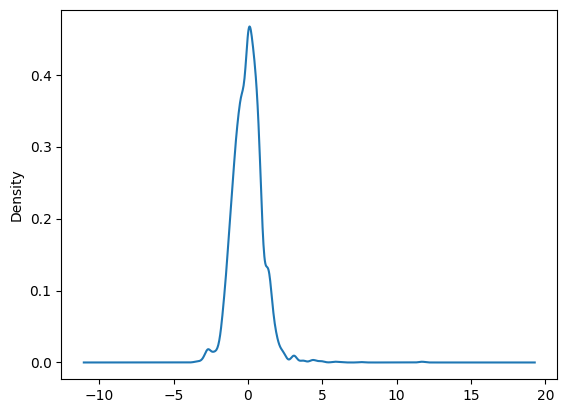

In [130]:
num_std['age_10_to_19'].plot(kind='density')

###### Encoding the Categorical columns using OneHotEncoder

In [131]:
file = cat
cat_encod = ol.one_hot_encoding(file)

cat_encod = cat_encod.reset_index(drop=True)
cat_encod.head(2)

,payer_type_COMMERCIAL,payer_type_MEDICAID,payer_type_MEDICARE ADVANTAGE,Region_Midwest,Region_Northeast,Region_South,Region_West,Division_East North Central,Division_East South Central,Division_Middle Atlantic,Division_Mountain,Division_Pacific,Division_South Atlantic,Division_West North Central,Division_West South Central
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### Reset the index of `target`

In [132]:
target.head(2)

,bmi
1,35.36
6,33.10


In [133]:
target = target.reset_index(drop=True)
target.head(2)

,bmi
0,35.36
1,33.10


###### Concatenate the dataframe - `num_std`, `cat` and `target`

In [134]:
df = [num_std, cat_encod, target]
df_prep = ol.concat_df(df)
df_prep.head(2)

,patient_zip3,patient_age,metastatic_diagnosis_period,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,...,Region_West,Division_East North Central,Division_East South Central,Division_Middle Atlantic,Division_Mountain,Division_Pacific,Division_South Atlantic,Division_West North Central,Division_West South Central,bmi
0,0.174309,-0.294980,-0.642962,-1.338755,-0.475061,0.750212,0.078335,-0.378862,-0.557659,-0.780954,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.36
1,-0.480889,-0.137662,-0.405784,-1.108522,-0.452973,0.478915,0.870672,0.144185,-0.743823,-0.903639,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.10


###### Train the Model to be use for predicting the NaN values

In [135]:
def train_and_score_model(file, model_name, target_column, seed):
    
    '''
    This function split the pandas dataframe into features and target and convert them into array.
    It uses the train_test_split library from sklearn to split the features and target into training and test set for training a mode.
    It iteratively uses the defined seedSearch on the train_test_split to fit, predict and score a training model on a range of seeds
    and select the seed that gives best score which measures its performance.
    
    Inputs:
        file: This is the pandas dataframe to train a model on.
        model_name: This is the model to be use for training the dataset depending on the use case and the dataset.
        target_column: This is the target column i.e the column to be predicted from the pandas dataframe.
        seed: The random integer to be specify to allow for reproducibility.
           
    Output:
        This function returns y_pred, y_test and the metrics - mse, rmse, mae, r2.
    '''
    feat_df = file.drop(target_column, axis=1)
    target_df = file[target_column]
    X = feat_df.values
    y = target_df.values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
    model_name.fit(X_train, y_train)
    y_pred = model_name.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"The mean_squared_error is {mse}")
    print(f"The root_mean_squared_error is {rmse}")
    print(f"The r2 score is {r2}")
    return y_pred,y_test,mse,rmse,mae,r2

###### <font color = 'blue'> Model to Predict `bmi NaN values with HyperParameter Tunning`

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [137]:
lasso_model = Lasso()

###### Hyperparameter Tunning for Lasso

In [138]:
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [139]:
lasso_gridCV = GridSearchCV(
    lasso_model,
    param_grid_lasso,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

In [140]:
file = df_prep
model_name = lasso_gridCV
target_column = 'bmi'
seed = 42
y_pred,y_test,mse,rmse,mae,r2 = train_and_score_model(file, model_name, target_column, seed)

The mean_squared_error is 29.46459066981734
The root_mean_squared_error is 5.428129573786659
The r2 score is 0.023940663220790137


###### Accessing the best model

In [141]:
model_name = lasso_gridCV.best_estimator_

###### Accessing the best parameter and score

In [142]:
lasso_gridCV.best_params_

{'alpha': 0.1}

In [143]:
lasso_gridCV.best_score_

-33.83670944373407

In [144]:
model_name

Lasso(alpha=0.1)

In [145]:
y_pred

array([29.57533042, 28.19463101, 29.08771444, ..., 27.73638443,
       28.11638951, 28.84928111])

In [146]:
y_test

array([31.  , 21.63, 29.63, ..., 28.25, 21.39, 25.09])

In [147]:
mae

4.507304825189005

###### <font color = 'green'> We preprocess the `train_wt_NaN` to be use as validation data to predict the `NaN values` for `bmi`

In [148]:
train_wt_NaN.head(2)

,payer_type,patient_zip3,Region,Division,patient_age,bmi,metastatic_diagnosis_period,population,density,age_median,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,COMMERCIAL,724,South,West South Central,39,NaN,191,3924.87,82.63,42.58,...,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18
2,COMMERCIAL,925,West,Pacific,59,NaN,157,38343.18,700.34,36.28,...,60.97,68.50,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58


In [149]:
file = train_wt_NaN
target_col = 'bmi'
features, target = ol.feature_target_selector(file, target_col)

###### Select `Numerical` and `Categorical` Features for the `train_wt_NaN` dataset

In [150]:
file = features
cat = ol.categorical_data(file)
cat.head(2)

,payer_type,Region,Division
0,COMMERCIAL,South,West South Central
2,COMMERCIAL,West,Pacific


In [151]:
print(cat.shape)
cat.isnull().sum()

(9071, 3)


payer_type    0
Region        0
Division      0
dtype: int64

In [152]:
file = features
num = ol.numerical_data(file)
num.head(2)

,patient_zip3,patient_age,metastatic_diagnosis_period,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,724,39,191,3924.87,82.63,42.58,11.61,13.03,10.87,11.80,...,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18
2,925,59,157,38343.18,700.34,36.28,13.27,15.66,13.49,13.45,...,60.97,68.50,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58


In [153]:
print(num.shape)
num.isnull().sum()

(9071, 139)


patient_zip3                   0
patient_age                    0
metastatic_diagnosis_period    0
population                     0
density                        0
                              ..
Average of Aug-18              0
Average of Sep-18              0
Average of Oct-18              0
Average of Nov-18              0
Average of Dec-18              0
Length: 139, dtype: int64

###### Transform `Numerical data` using `StandardScaler` and Encode the `Categorical data` using `OneHotEncoder`

In [154]:
file = num
num_std = ol.standard_scaler(file)

In [155]:
file = cat
cat_encod = ol.one_hot_encoding(file)

cat_encod = cat_encod.reset_index(drop=True)
cat_encod.head(2)

,payer_type_COMMERCIAL,payer_type_MEDICAID,payer_type_MEDICARE ADVANTAGE,Region_Midwest,Region_Northeast,Region_South,Region_West,Division_East North Central,Division_East South Central,Division_Middle Atlantic,Division_Mountain,Division_Pacific,Division_South Atlantic,Division_West North Central,Division_West South Central
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


###### Concatenate the `cat_encod` and `num_std` for the `train_wt_NaN` without the `bmi` column since that will want to predict

In [156]:
df = [num_std, cat_encod]
train_NaN = ol.concat_df(df)
train_NaN.head(2)

,patient_zip3,patient_age,metastatic_diagnosis_period,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,...,Region_South,Region_West,Division_East North Central,Division_East South Central,Division_Middle Atlantic,Division_Mountain,Division_Pacific,Division_South Atlantic,Division_West North Central,Division_West South Central
0,0.584874,-1.526502,0.899695,-1.189513,-0.431509,0.503050,0.334505,0.100533,-0.710343,-0.461964,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.314883,-0.037740,0.586391,1.283647,-0.282428,-1.057628,1.437387,1.435892,0.065452,0.207272,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


###### Use the model to predict the `NaN values`

###### <font color = 'blue'> Using the best model to predict `bmi NaN values`

In [157]:
lasso_gridCV = model_name
lasso_gridCV

Lasso(alpha=0.1)

In [158]:
y_bmi_NaN = lasso_gridCV.predict(train_NaN)
y_bmi_NaN[:10]

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


array([30.23062772, 29.19049483, 27.93835766, 28.08859489, 29.43748837,
       29.65710763, 29.37960026, 29.0348961 , 28.87367037, 29.133357  ])

###### Convert the `bmi predicted NaN values` to DataFrame 

In [159]:
bmi_pred = pd.DataFrame(y_bmi_NaN, columns=['bmi'])
bmi_pred.head(2)

,bmi
0,30.230628
1,29.190495


###### Replace the `bmi NaN values` with the predictions made

In [160]:
train_wt_NaN.head(2)

,payer_type,patient_zip3,Region,Division,patient_age,bmi,metastatic_diagnosis_period,population,density,age_median,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,COMMERCIAL,724,South,West South Central,39,NaN,191,3924.87,82.63,42.58,...,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18
2,COMMERCIAL,925,West,Pacific,59,NaN,157,38343.18,700.34,36.28,...,60.97,68.50,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58


In [161]:
train_wt_NaN.loc[train_wt_NaN['bmi'].isna(), 'bmi'] = y_bmi_NaN

train_wt_NaN_corrected = train_wt_NaN.reset_index(drop=True)
train_wt_NaN_corrected.head(2)

,payer_type,patient_zip3,Region,Division,patient_age,bmi,metastatic_diagnosis_period,population,density,age_median,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,COMMERCIAL,724,South,West South Central,39,30.230628,191,3924.87,82.63,42.58,...,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18
1,COMMERCIAL,925,West,Pacific,59,29.190495,157,38343.18,700.34,36.28,...,60.97,68.50,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58


In [162]:
train_wt_NaN_corrected.bmi.isnull().sum()

0

###### <font color = 'green'> Concatenate the dataset without NaN with the dataset with NaN but predicted - `train_wto_NaN` and `train_wt_NaN_corrected`

In [163]:
train_wto_NaN.head(2)

,payer_type,patient_zip3,Region,Division,patient_age,bmi,metastatic_diagnosis_period,population,density,age_median,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
1,COMMERCIAL,629,Midwest,East North Central,55,35.36,33,2745.39,51.79,43.54,...,44.18,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71
6,MEDICARE ADVANTAGE,448,Midwest,East North Central,57,33.10,59,5890.57,122.39,42.45,...,34.44,42.62,65.91,71.26,74.03,73.94,69.12,53.50,36.43,34.10


In [164]:
train_wt_NaN_corrected.head(2)

,payer_type,patient_zip3,Region,Division,patient_age,bmi,metastatic_diagnosis_period,population,density,age_median,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,COMMERCIAL,724,South,West South Central,39,30.230628,191,3924.87,82.63,42.58,...,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18
1,COMMERCIAL,925,West,Pacific,59,29.190495,157,38343.18,700.34,36.28,...,60.97,68.50,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58


###### Reset Indexes

In [165]:
train_wto_NaN = train_wto_NaN.reset_index(drop=True)
train_wto_NaN.head(2)

,payer_type,patient_zip3,Region,Division,patient_age,bmi,metastatic_diagnosis_period,population,density,age_median,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,COMMERCIAL,629,Midwest,East North Central,55,35.36,33,2745.39,51.79,43.54,...,44.18,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71
1,MEDICARE ADVANTAGE,448,Midwest,East North Central,57,33.10,59,5890.57,122.39,42.45,...,34.44,42.62,65.91,71.26,74.03,73.94,69.12,53.50,36.43,34.10


In [166]:
train_clean_data = pd.concat([train_wto_NaN, train_wt_NaN_corrected], axis=0)
train_clean_data.head(2)

,payer_type,patient_zip3,Region,Division,patient_age,bmi,metastatic_diagnosis_period,population,density,age_median,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,COMMERCIAL,629,Midwest,East North Central,55,35.36,33,2745.39,51.79,43.54,...,44.18,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71
1,MEDICARE ADVANTAGE,448,Midwest,East North Central,57,33.10,59,5890.57,122.39,42.45,...,34.44,42.62,65.91,71.26,74.03,73.94,69.12,53.50,36.43,34.10


In [167]:
print(train_clean_data.shape)
print(train_clean_data.duplicated().sum())
train_clean_data.isnull().sum()

(13173, 143)
169


payer_type           0
patient_zip3         0
Region               0
Division             0
patient_age          0
                    ..
Average of Aug-18    0
Average of Sep-18    0
Average of Oct-18    0
Average of Nov-18    0
Average of Dec-18    0
Length: 143, dtype: int64

###### Save the preprocessed `train_clean_data` in the folder

In [168]:
main_dir = main
file_name = train_clean_data
dest_path = 'outputs'
save_name = 'train_cleaned_data_v2-1-v1'
ext = '.csv'
ol.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

The file is train_cleaned_data_v2-1-v1 and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\wids_breast_cancer_project/outputs folder


## <font color = 'cyan'> Train a baseline model to predict the given class - `metastatic_diagnosis_period`

In [169]:
train_clean_data.head(2)

,payer_type,patient_zip3,Region,Division,patient_age,bmi,metastatic_diagnosis_period,population,density,age_median,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,COMMERCIAL,629,Midwest,East North Central,55,35.36,33,2745.39,51.79,43.54,...,44.18,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71
1,MEDICARE ADVANTAGE,448,Midwest,East North Central,57,33.10,59,5890.57,122.39,42.45,...,34.44,42.62,65.91,71.26,74.03,73.94,69.12,53.50,36.43,34.10


###### Exploratory Data Analysis on the training dataset

In [170]:
train_clean_data.describe()

,patient_zip3,patient_age,bmi,metastatic_diagnosis_period,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
count,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,...,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000
mean,568.530859,59.271313,29.146359,96.515221,20651.816650,1777.035067,40.542019,11.104606,12.857638,13.299533,...,46.071606,52.411982,67.932236,73.078198,77.096933,76.281821,71.418905,59.331590,46.122639,42.142952
std,275.758485,13.218883,3.267384,108.969873,13840.481131,3876.056049,4.030979,1.512086,1.952191,3.396621,...,11.975152,11.069900,6.301740,6.580792,5.350979,5.279297,6.501657,9.266474,12.263555,11.241144
min,100.000000,18.000000,15.000000,0.000000,635.550000,0.920000,20.600000,0.000000,6.310000,5.930000,...,22.720000,28.790000,45.880000,53.460000,58.540000,56.200000,51.830000,37.540000,19.150000,15.380000
25%,330.000000,50.000000,28.397972,3.000000,9160.340000,163.150000,37.190000,10.150000,11.650000,11.000000,...,36.240000,42.900000,63.220000,68.050000,73.170000,72.550000,67.020000,51.970000,35.560000,33.370000
50%,557.000000,59.000000,29.260000,44.000000,18952.780000,700.340000,40.640000,11.000000,12.900000,12.530000,...,43.240000,50.290000,66.120000,71.660000,76.610000,76.080000,70.880000,57.450000,42.430000,38.520000
75%,832.000000,67.000000,29.761473,181.000000,30021.280000,1666.520000,42.930000,12.140000,13.910000,14.970000,...,58.420000,62.220000,72.590000,77.660000,80.270000,79.130000,75.640000,67.360000,55.800000,50.520000
max,995.000000,91.000000,97.000000,365.000000,71374.130000,29851.690000,54.570000,17.680000,35.300000,62.100000,...,71.640000,76.490000,86.570000,90.660000,96.430000,95.770000,89.190000,81.460000,76.300000,74.950000


<Axes: ylabel='Density'>

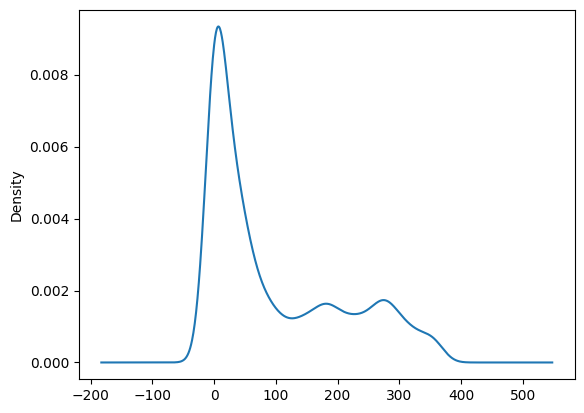

In [171]:
train_clean_data.metastatic_diagnosis_period.plot(kind='density')

<Axes: ylabel='Density'>

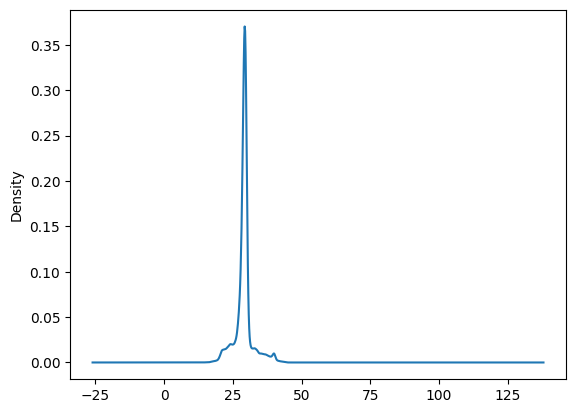

In [172]:
train_clean_data.bmi.plot(kind='density')

<Axes: >

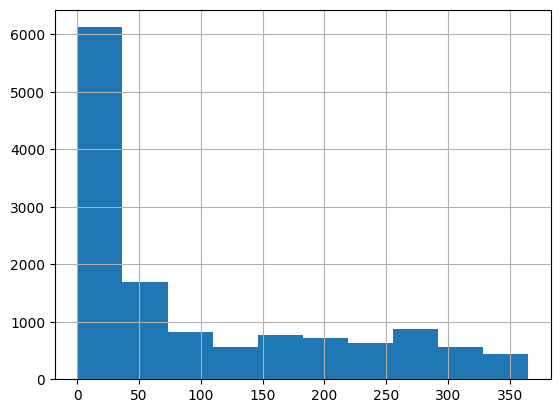

In [173]:
train_clean_data['metastatic_diagnosis_period'].hist()

<Axes: >

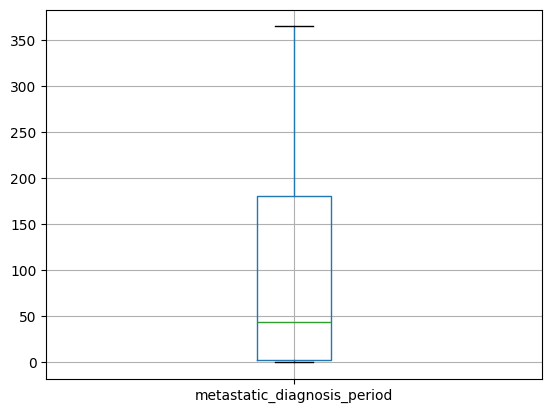

In [174]:
train_clean_data.boxplot('metastatic_diagnosis_period')

<Axes: >

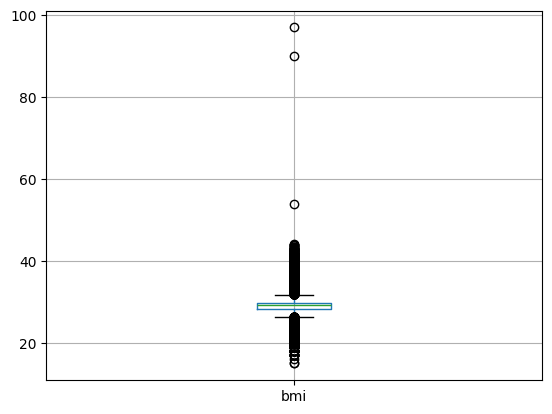

In [175]:
train_clean_data.boxplot('bmi')

In [176]:
train_clean_data.duplicated().sum()

169

In [177]:
train_clean_data.isnull().sum()

payer_type           0
patient_zip3         0
Region               0
Division             0
patient_age          0
                    ..
Average of Aug-18    0
Average of Sep-18    0
Average of Oct-18    0
Average of Nov-18    0
Average of Dec-18    0
Length: 143, dtype: int64

###### Make a copy of the cleaned dataset

In [178]:
training = train_clean_data.copy()

###### Removing Duplicates

In [179]:
training = training.drop_duplicates(keep='first')
training.head(2)

,payer_type,patient_zip3,Region,Division,patient_age,bmi,metastatic_diagnosis_period,population,density,age_median,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,COMMERCIAL,629,Midwest,East North Central,55,35.36,33,2745.39,51.79,43.54,...,44.18,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71
1,MEDICARE ADVANTAGE,448,Midwest,East North Central,57,33.10,59,5890.57,122.39,42.45,...,34.44,42.62,65.91,71.26,74.03,73.94,69.12,53.50,36.43,34.10


###### Correct Outliers

In [180]:
help(ol.outliers_correction_iqr)

Help on function outliers_correction_iqr in module olanrewaju:

outliers_correction_iqr(file, iqr_multiplier=1.5)
    This function correct outliers in a DataFrame using the interquartile range (IQR) strategy with an automatic strategy selection.

    Inputs:
        file: This is the dataset in pandas. This contains both numerical and categorical columns.
        iqr_multiplier: This is constant factor multiplier for IQR and is float, optional (default=1.5)
        The multiplier determines the threshold for identifying outliers based on IQR.

    Returns:
        DataFrame: It returns a pandas dataframe without outliers.
        DataFrame with outliers corrected based on automatically selected strategy.



In [181]:
file = training
training = ol.outliers_correction_iqr(file, iqr_multiplier=1.5)

<Axes: ylabel='bmi'>

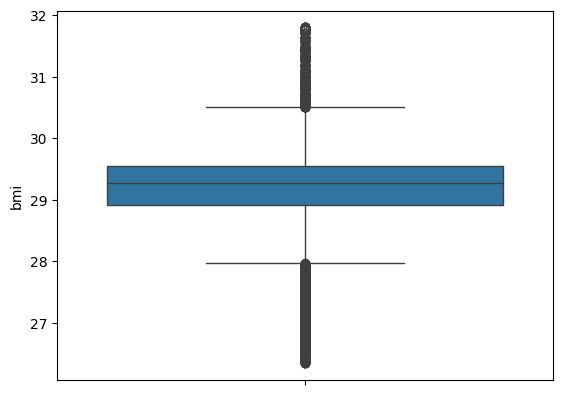

In [182]:
sb.boxplot(training['bmi'])

<Axes: ylabel='metastatic_diagnosis_period'>

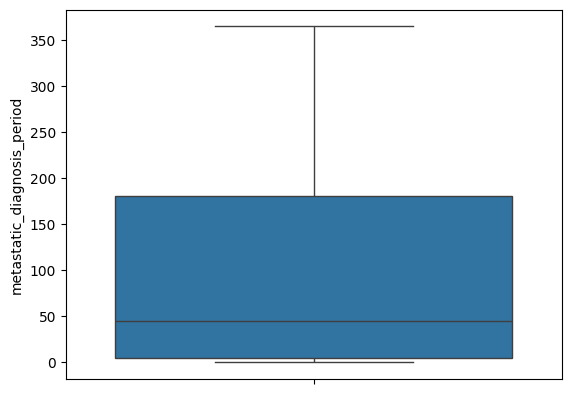

In [183]:
sb.boxplot(training['metastatic_diagnosis_period'])

<Axes: >

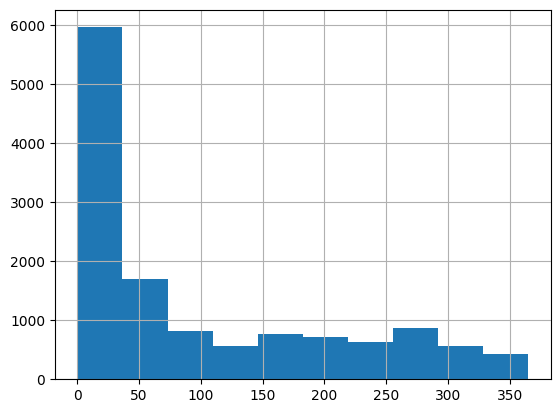

In [184]:
training['metastatic_diagnosis_period'].hist()

## <font color = 'red'> To build the baseline model

###### `Select features and target from the training data`

In [185]:
file = training
target_col = 'metastatic_diagnosis_period'
features, target = ol.feature_target_selector(file, target_col)

###### `Select numerical and categorical features`

In [186]:
file = features
cat_feat = ol.categorical_data(file)
cat_feat.head(2)

,payer_type,Region,Division
0,COMMERCIAL,Midwest,East North Central
1,MEDICARE ADVANTAGE,Midwest,East North Central


In [187]:
file = features
num_feat = ol.numerical_data(file)
num_feat.head(2)

,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,629.0,55.0,29.262969,2745.39,51.79,43.54,11.22,12.19,11.45,11.01,...,44.18,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71
1,448.0,57.0,29.262969,5890.57,122.39,42.45,12.43,13.19,10.81,10.73,...,34.44,42.62,65.91,71.26,74.03,73.94,69.12,53.50,36.43,34.10


###### `Encoding and Transforming categorical and numerical features` - `categorical, we use OneHotEncoding` and `numerical, we use Normalizer`

In [188]:
file = cat_feat
cat_feat_encod = ol.one_hot_encoding(file)

cat_feat_encod = cat_feat_encod.reset_index(drop=True)
cat_feat_encod.head(2)

,payer_type_COMMERCIAL,payer_type_MEDICAID,payer_type_MEDICARE ADVANTAGE,Region_Midwest,Region_Northeast,Region_South,Region_West,Division_East North Central,Division_East South Central,Division_Middle Atlantic,Division_Mountain,Division_Pacific,Division_South Atlantic,Division_West North Central,Division_West South Central
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [189]:
help(ol.norm_scaler)

Help on function norm_scaler in module olanrewaju:

norm_scaler(file)
    This function transform the numerical columns into normalized values using the sklearn preprocessing library Normalizer.
    Input:
        file: This is pandas dataframe containing ONLY the numerical columns.
    Output:
        This returns the transformed pandas dataframe for all numerical columns in the dataset.



In [190]:
file = num_feat
num_feat_norm = ol.norm_scaler(file)
num_feat_norm.head(2)

,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,0.005755,0.000503,0.000268,0.025117,0.000474,0.000398,0.000103,0.000112,0.000105,0.000101,...,0.000404,0.000451,0.000667,0.000708,0.000708,0.000694,0.000665,0.000534,0.000363,0.000363
1,0.002978,0.000379,0.000195,0.039163,0.000814,0.000282,0.000083,0.000088,0.000072,0.000071,...,0.000229,0.000283,0.000438,0.000474,0.000492,0.000492,0.000460,0.000356,0.000242,0.000227


In [191]:
target_reset = target.reset_index(drop=True)
target_reset.head(2)

,metastatic_diagnosis_period
0,33.0
1,59.0


###### `Concatenate all the preprocessed dataset`

In [192]:
df = [num_feat_norm, cat_feat_encod, target_reset]
cleaned_df = ol.concat_df(df)
cleaned_df.head(2)

,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,...,Region_West,Division_East North Central,Division_East South Central,Division_Middle Atlantic,Division_Mountain,Division_Pacific,Division_South Atlantic,Division_West North Central,Division_West South Central,metastatic_diagnosis_period
0,0.005755,0.000503,0.000268,0.025117,0.000474,0.000398,0.000103,0.000112,0.000105,0.000101,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0
1,0.002978,0.000379,0.000195,0.039163,0.000814,0.000282,0.000083,0.000088,0.000072,0.000071,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


###### `Pre-installation of some model dependencies`

## `The baseline Model`

In [193]:
def train_and_score_model(file, model_name, target_column, seed):
    
    '''
    This function split the pandas dataframe into features and target and convert them into array.
    It uses the train_test_split library from sklearn to split the features and target into training and test set for training a mode.
    It iteratively uses the defined seedSearch on the train_test_split to fit, predict and score a training model on a range of seeds
    and select the seed that gives best score which measures its performance.
    
    Inputs:
        file: This is the pandas dataframe to train a model on.
        model_name: This is the model to be use for training the dataset depending on the use case and the dataset.
        target_column: This is the target column i.e the column to be predicted from the pandas dataframe.
        seed: The random integer to be specify to allow for reproducibility.
           
    Output:
        This function returns y_pred, y_test and the metrics - mse, rmse, mae, r2.
    '''
    feat_df = file.drop(target_column, axis=1)
    target_df = file[target_column]
    X = feat_df.values
    y = target_df.values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
    model_name.fit(X_train, y_train)
    y_pred = model_name.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"The mean_squared_error is {mse}")
    print(f"The root_mean_squared_error is {rmse}")
    print(f"The r2 score is {r2}")
    return y_pred,y_test,mse,rmse,mae,r2

###### <font color = 'blue'> Baseline Model to Predict `metastatic_diagnosis_period with HyperParameter Tunning`

###### Hyperparameter tunning for the baseline model - `CatBoostRegressor`

In [194]:
seed = 42

###### Define the cross_validation techniques

In [195]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=seed, shuffle=True)

###### Define the model with the gridsearch

###### Use the function and train the model on the dataset

###### Accessing the best model

###### Accessing best parameter and score

### <font color = 'cyan'> Hyperparameter Optimization - Important Features Selection

###### <font color = 'green'> Using `Recursive Features Elimination - RFE`

In [196]:
help(ol.feature_selection_rfe)

Help on function feature_selection_rfe in module olanrewaju:

feature_selection_rfe(file, model_name, num_of_features, target_column)
    This function uses the recursive features elimination to select the important features based on the number of features specified by user.
    It split the pandas dataframe into features and target columns and convert them into arrays.
    Inputs:
        file: This is the pandas dataframe and it is the cleaned dataframe obtained after data cleaning up to encoding and transforming.
        model_name: This is the model to be used by the rfe in selecting the important features and it solely depends on the use case.
        num_of_features: This is the total number of important features you want to select from the pandas dataframe that significantly contribute
        to the prediction of the target. it must be a single value defined as a list.
        target_column: This is the target column from the pandas dataframe and must be a string.
    Output:
 

###### We would be using `Lasso(alpha=0.5)` as our input model for the `RFE`

In [197]:
file = cleaned_df
model_name = Lasso(alpha=0.5)
num_of_features = [30]
target_column = 'metastatic_diagnosis_period'
selected_arr_feat = ol.feature_selection_rfe(file, model_name, num_of_features, target_column)
selected_arr_feat

Num of features is 30


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,

In [198]:
help(ol.convert_rfe_features_to_dataframe)

Help on function convert_rfe_features_to_dataframe in module olanrewaju:

convert_rfe_features_to_dataframe(file, selected_features)
    This function convert the important array features selected by rfe into a pandas dataframe.
    Inputs:
        file: This is the pandas dataframe and it is the cleaned dataframe obtained after data cleaning up to encoding and transforming.
        selected_features: This is the rfe selected features as defined by the support_ library.
    Output:
        This returns the pandas dataframe ONLY the True important features as selected by rfe.



In [199]:
file = cleaned_df
selected_features = selected_arr_feat
rfe = ol.convert_rfe_features_to_dataframe(file, selected_features)
rfe.head(2)

The selected index columns for features is/are: [124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153]
The selected columns of features is/are: ['Average of Oct-17', 'Average of Nov-17', 'Average of Dec-17', 'Average of Jan-18', 'Average of Feb-18', 'Average of Mar-18', 'Average of Apr-18', 'Average of May-18', 'Average of Jun-18', 'Average of Jul-18', 'Average of Aug-18', 'Average of Sep-18', 'Average of Oct-18', 'Average of Nov-18', 'Average of Dec-18', 'payer_type_COMMERCIAL', 'payer_type_MEDICAID', 'payer_type_MEDICARE ADVANTAGE', 'Region_Midwest', 'Region_Northeast', 'Region_South', 'Region_West', 'Division_East North Central', 'Division_East South Central', 'Division_Middle Atlantic', 'Division_Mountain', 'Division_Pacific', 'Division_South Atlantic', 'Division_West North Central', 'Division_West South Central']


,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,...,Region_South,Region_West,Division_East North Central,Division_East South Central,Division_Middle Atlantic,Division_Mountain,Division_Pacific,Division_South Atlantic,Division_West North Central,Division_West South Central
0,0.000546,0.000426,0.000322,0.000260,0.000366,0.000404,0.000451,0.000667,0.000708,0.000708,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000383,0.000272,0.000182,0.000158,0.000222,0.000229,0.000283,0.000438,0.000474,0.000492,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [200]:
help(ol.merging_rfe_df)

Help on function merging_rfe_df in module olanrewaju:

merging_rfe_df(file, target_column, rfe_df)
    This function is use to merge the converted important features by rfe and the target to form a pandas dataframe having only the important features
    and the target column.
    Inputs:
        file: This is the pandas dataframe and it is the cleaned dataframe obtained after data cleaning up to encoding and transforming.
        target_column: This is the target column to be predicted from the dataframe.
        rfe_df: This is the pandas dataframe obtained from the converted_rfe_features_to_dataframe.
    Output:
        This returns the pandas dataframe consisting of ONLY the important features and the target column.



In [201]:
file = cleaned_df
target_column = 'metastatic_diagnosis_period'
rfe_df = rfe
rfe_df = ol.merging_rfe_df(file, target_column, rfe_df)
rfe_df.head(2)

,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,...,Region_West,Division_East North Central,Division_East South Central,Division_Middle Atlantic,Division_Mountain,Division_Pacific,Division_South Atlantic,Division_West North Central,Division_West South Central,metastatic_diagnosis_period
0,0.000546,0.000426,0.000322,0.000260,0.000366,0.000404,0.000451,0.000667,0.000708,0.000708,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0
1,0.000383,0.000272,0.000182,0.000158,0.000222,0.000229,0.000283,0.000438,0.000474,0.000492,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


#### <font color = 'blue'> `Model Training` using the selected important columns

In [202]:
data = rfe_df.copy()

#### <font color = 'red'> This section implements 10 models on the RFE selected dataset:
    1.CatBoost
    2.XGBoost
    3.LightGBM
    4.Random Forest
    5.Decision Tree
    6.Gradient Boosting
    7.AdaBoost
    8.ExtraTrees
    9.LightGBM with Tweedie objective
    10.KNeighbors

In [203]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV

###### `1. CatBoostRegressor`

###### `1. XGBoostRegressor`

###### instantiate the instance of the model

In [204]:
xgbr = XGBRegressor()

###### Hyperparameter tunning for the model - `XGBRegressor`

In [205]:
param_grid_xgbr = {
    'n_estimators': [50, 100],
    'learning_rate': [0.001, 0.1],
    'max_depth': [6, 8],
    'subsample': [0.8, 1.0],
    'n_jobs': [-1]
}

###### Instantiate the model with GridSearchCV

In [206]:
%%time
xgbr_gridCV = GridSearchCV(
    xgbr,
    param_grid_xgbr,
    cv=cv,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

CPU times: total: 0 ns
Wall time: 0 ns


###### Use the function and train the model on the rfe_df - `data` 

In [207]:
%%time
file = data
model_name = xgbr_gridCV
target_column = 'metastatic_diagnosis_period'
seed = seed
y_pred,y_test,mse,rmse,mae,r2 = train_and_score_model(file, model_name, target_column, seed)

The mean_squared_error is 12020.228201448339
The root_mean_squared_error is 109.63680130981722
The r2 score is 0.0009852730123930398
CPU times: total: 5.19 s
Wall time: 17.5 s


###### Accessing the `best_xgbr_gridCV_model`

In [208]:
xgbr_best_model = xgbr_gridCV.best_estimator_

###### Accessing the best parameters and scores

In [209]:
xgbr_gridCV.best_params_

{'learning_rate': 0.001,
 'max_depth': 8,
 'n_estimators': 100,
 'n_jobs': -1,
 'subsample': 1.0}

In [210]:
xgbr_gridCV.best_score_

-11825.826438721348

In [211]:
xgbr_best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

###### `2. GradientBoostingRegressor`

###### instantiate the instance of the model

In [212]:
gbr = GradientBoostingRegressor()

###### Hyperparameter tunning for the model - `GradientBoostingRegressor`

In [213]:
param_grid_gbr = {
    'n_estimators': [50, 100],
    'learning_rate': [0.001, 0.01],
    'max_depth': [6, 8],
    'subsample': [0.8, 1.0]
}

###### Instantiate the model with GridSearchCV

In [214]:
%%time
gbr_gridCV = GridSearchCV(
    gbr,
    param_grid_gbr,
    cv=cv,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

CPU times: total: 0 ns
Wall time: 0 ns


###### Use the function and train the model on the rfe_df - `data` 

In [215]:
%%time
file = data
model_name = gbr_gridCV
target_column = 'metastatic_diagnosis_period'
seed = seed
y_pred,y_test,mse,rmse,mae,r2 = train_and_score_model(file, model_name, target_column, seed)

The mean_squared_error is 12031.036018281806
The root_mean_squared_error is 109.68607941886611
The r2 score is 8.702316203512694e-05
CPU times: total: 2.25 s
Wall time: 1min 18s


###### Accessing the `best_gbr_gridCV_model`

In [216]:
gbr_best_model = gbr_gridCV.best_estimator_

###### Accessing the best parameters and scores

In [217]:
gbr_gridCV.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 50, 'subsample': 0.8}

In [218]:
gbr_gridCV.best_score_

-11801.427237434702

In [219]:
gbr_best_model 

GradientBoostingRegressor(learning_rate=0.01, max_depth=8, n_estimators=50,
                          subsample=0.8)

###### `3. AdaBoostRegressor`

###### **For `AdaBoostRegressor`we will be using the `DecisionTreeRegressor` as the `base_estimator`**

###### instantiate the instance of the base estimator

In [220]:
dtr = DecisionTreeRegressor()

###### instantiate the instance of the model

In [221]:
abr = AdaBoostRegressor()

###### Hyperparameter tunning for the model - `AdaBoostRegressor`

In [222]:
param_grid_abr = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.05]
}

###### Instantiate the model with GridSearchCV

In [223]:
%%time
abr_gridCV = GridSearchCV(
    abr,
    param_grid_abr,
    cv=cv,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

CPU times: total: 0 ns
Wall time: 0 ns


###### Use the function and train the model on the rfe_df - `data`

In [224]:
%%time
file = data
model_name = abr_gridCV
target_column = 'metastatic_diagnosis_period'
seed = seed
y_pred,y_test,mse,rmse,mae,r2 = train_and_score_model(file, model_name, target_column, seed)

The mean_squared_error is 12026.88863768536
The root_mean_squared_error is 109.66717210581004
The r2 score is 0.00043171664246111074
CPU times: total: 1.2 s
Wall time: 13.7 s


###### Accessing the `best_abr_gridCV_model`

In [225]:
abr_best_model = abr_gridCV.best_estimator_

###### Accessing the best parameters and scores

In [226]:
abr_gridCV.best_params_

{'learning_rate': 0.01, 'n_estimators': 50}

In [227]:
abr_gridCV.best_score_

-11835.426969149134

In [228]:
abr_best_model

AdaBoostRegressor(learning_rate=0.01)

###### `2. XGBoostRegressor`

###### `3. LightGBMRegressor`

###### `4. RandomForestRegressor`

###### `5. DecisionTreeRgressor`

###### `6. GradientBoostingRegressor`

###### `7. AdaBoostRegressor`

###### `8. ExtraTreesRegressor`

###### `9. LightGBM with Tweedie objective`

###### `10. KNeighborsRegressor`

#### <font color = 'purple'> Ensembling Method for Combining all the Models

###### We would be using the `StackingRegressor` and the `VotingRegressor` as our `Ensembling Regressor`

###### `1. Using StackingRegressor`

###### **For a `StackingRegressor` we would need a `final_estimator`, so we would adopt the `RidgeRegressor`**

In [229]:
from sklearn.linear_model import Ridge

###### instantiate the instance of the `final_estimator` for `StackingRegressor`

In [230]:
ridge = Ridge()

###### Hyperparameter tunning for the model - `Ridge`

In [231]:
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

###### Instantiate the `final_estimator` with GridSearchCV

In [232]:
%%time
ridge_gridCV = GridSearchCV(
    ridge,
    param_grid_ridge,
    cv=cv,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

CPU times: total: 0 ns
Wall time: 0 ns


###### Use the function and train the model on the rfe_df - `data`

In [233]:
%%time
file = data
model_name = ridge_gridCV
target_column = 'metastatic_diagnosis_period'
seed = seed
y_pred,y_test,mse,rmse,mae,r2 = train_and_score_model(file, model_name, target_column, seed)

The mean_squared_error is 12023.967350623387
The root_mean_squared_error is 109.65385242034768
The r2 score is 0.0006745081059642555
CPU times: total: 31.2 ms
Wall time: 292 ms


###### Accessing the `best_ridge_gridCV_model`

In [234]:
ridge_best_model = ridge_gridCV.best_estimator_

###### Accessing the best parameters and scores

In [235]:
ridge_gridCV.best_params_

{'alpha': 0.001}

In [236]:
ridge_gridCV.best_score_

-11841.286925453767

In [237]:
ridge_best_model

Ridge(alpha=0.001)

###### We would now ensemble all the best models as estimators for the `StackingRegressor`

In [238]:
from sklearn.ensemble import StackingRegressor

###### Define all the estimators - `XGBoostRegressor - xgbr_best_model`, `GradientBoostingRegressor - gbr_best_model` and `AdaBoostRegressor - abr_best_model`

In [239]:
estimators_sr = [
    ('XGBoost', xgbr_best_model),
    ('GBoost', gbr_best_model),
    ('AdaBoost', abr_best_model)
]

###### Instantiate the instance of the `StackingRegressor`

In [240]:
sr = StackingRegressor(
    estimators=estimators_sr,
    final_estimator=ridge_best_model
)

sr

StackingRegressor(estimators=[('XGBoost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learnin...
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('GBoost',
                               GradientBoostingRegressor(learning_rate=0.01,
                                                         max_depth=8,
                                                         n_estimators=50,
                                                         subsample=0.8)),
                              ('AdaBoost',
                               AdaBoostRegressor(learning_rate=0.01))],
                  final_estimator=Ridge(alpha=0.001))

###### Use the function and train the model on the rfe_df - `data`

In [241]:
file = data
model_name = sr
target_column = 'metastatic_diagnosis_period'
seed = seed
y_pred,y_test,mse,rmse,mae,r2 = train_and_score_model(file, model_name, target_column, seed)

The mean_squared_error is 12015.370871690424
The root_mean_squared_error is 109.61464715853636
The r2 score is 0.0013889711685901585


In [242]:
sr

StackingRegressor(estimators=[('XGBoost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learnin...
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('GBoost',
                               GradientBoostingRegressor(learning_rate=0.01,
                                                         max_depth=8,
                                                         n_estimators=50,
                                                         subsample=0.8)),
                              ('AdaBoost',
                               AdaBoostRegressor(learning_rate=0.01))],
                  final_estimator=Ridge(alpha=0.001))

###### Save the `sr` model

In [243]:
main_dir = main
model = sr
path = 'models'
save_model_name = 'sr_ensembled_model-v2-1-v1'
ext = '.pkl'
ol.saving_model_versions(main_dir, model, path, save_model_name, ext)

The model is sr_ensembled_model-v2-1-v1 and is saved in the models folder


##### `2. VotingRegressor`
`Be sure you picked those models that perform better in terms of their metrics.`

In [244]:
from sklearn.ensemble import VotingRegressor

###### Define all the estimators - `XGBoostRegressor - xgbr_best_model`, `GradientBoostingRegressor - gbr_best_model` and `AdaBoostRegressor - abr_best_model`

In [245]:
estimators_vr = [
    ('XGBoost', xgbr_best_model),
    ('GBoost', gbr_best_model),
    ('AdaBoost', abr_best_model)
]

###### Instantiate the instance of the `VotingRegressor`

In [246]:
vr = VotingRegressor(
    estimators=estimators_vr
)

vr

VotingRegressor(estimators=[('XGBoost',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_...
                                          max_delta_step=None, max_depth=8,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=100,
                                          n_jobs=-1, num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('GBoost',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=8,
                                                       n_estimators=50,
                                                       subsample=0.8)),
                            ('AdaBoost',
                             AdaBoostRegressor(learning_rate=0.01))])

###### Use the function and train the model on the rfe_df - `data`

In [247]:
file = data
model_name = vr
target_column = 'metastatic_diagnosis_period'
seed = seed
y_pred,y_test,mse,rmse,mae,r2 = train_and_score_model(file, model_name, target_column, seed)

The mean_squared_error is 12016.153172236347
The root_mean_squared_error is 109.61821551291713
The r2 score is 0.0013239532876306859


In [248]:
vr

VotingRegressor(estimators=[('XGBoost',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_...
                                          max_delta_step=None, max_depth=8,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=100,
                                          n_jobs=-1, num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('GBoost',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=8,
                                                       n_estimators=50,
                                                       subsample=0.8)),
                            ('AdaBoost',
                             AdaBoostRegressor(learning_rate=0.01))])

###### Save the `vr` model

In [249]:
main_dir = main
model = vr
path = 'models'
save_model_name = 'vr_ensembled_model-v2-1-v1'
ext = '.pkl'
ol.saving_model_versions(main_dir, model, path, save_model_name, ext)

The model is vr_ensembled_model-v2-1-v1 and is saved in the models folder


###### `3. Ensembling the StackingRegressor with the VotingRegressor while using the VotingRegressor as a final_estimator`

In [250]:
from sklearn.ensemble import StackingRegressor

###### Define all the estimators - `XGBoostRegressor - xgbr_best_model`, `GradientBoostingRegressor - gbr_best_model` and `AdaBoostRegressor - abr_best_model`

In [251]:
estimator_sr_vr = [
    ('XGBoost', xgbr_best_model),
    ('GBoost', gbr_best_model),
    ('AdaBoost', abr_best_model)
]

###### Instantiate the instance of the `sr_vrRegressor`

In [252]:
sr_vr = StackingRegressor(
    estimators=estimator_sr_vr,
    final_estimator=vr
)

sr_vr

StackingRegressor(estimators=[('XGBoost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learnin...
                                                                            max_delta_step=None,
                                                                            max_depth=8,
                                                                            max_leaves=None,
                                                                            min_child_weight=None,
                                                                            missing=nan,
                                                                            monotone_constraints=None,
                                                                            multi_strategy=None,
                                                                            n_estimators=100,
                                                                            n_jobs=-1,
                                                                            num_parallel_tree=None,
                                                                            random_state=None, ...)),
                                                              ('GBoost',
                                                               GradientBoostingRegressor(learning_rate=0.01,
                                                                                         max_depth=8,
                                                                                         n_estimators=50,
                                                                                         subsample=0.8)),
                                                              ('AdaBoost',
                                                               AdaBoostRegressor(learning_rate=0.01))]))

###### Use the function and train the model on the rfe_df - `data`

In [253]:
file = data
model_name = sr_vr
target_column = 'metastatic_diagnosis_period'
seed = seed
y_pred,y_test,mse,rmse,mae,r2 = train_and_score_model(file, model_name, target_column, seed)

The mean_squared_error is 12021.035091944379
The root_mean_squared_error is 109.64048108223705
The r2 score is 0.0009182114329371327


###### Save the `sr_vr` model

In [254]:
main_dir = main
model = sr_vr
path = 'models'
save_model_name = 'sr_vr_ensembled_model-v2-1-v1'
ext = '.pkl'
ol.saving_model_versions(main_dir, model, path, save_model_name, ext)

The model is sr_vr_ensembled_model-v2-1-v1 and is saved in the models folder


##### <font color = 'purple'> The Final Regressor

###### `4.`Ensembling `sr`, `vr`, `sr_vr` and adding two more models with a new final_estimator and using `StackingRegreesor` to obtain a Final Model

In [255]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

###### Instantiate the instances of the newly added models

In [256]:
rfr = RandomForestRegressor()

In [257]:
hgbr = HistGradientBoostingRegressor()

In [258]:
etr = ExtraTreesRegressor()

###### Define all the estimators - `sr`, `vr` and `sr_vr`

In [259]:
estimator_final = [
    ('sr', sr),
    ('vr', vr),
    ('sr_vr', sr_vr),
    ('random_forest', rfr),
    ('extra_trees', etr)
]

###### Instantiate the instance of the `finalRegressor`

In [260]:
final_regressor = StackingRegressor(
    estimators=estimator_final,
    final_estimator=hgbr
)

final_regressor

StackingRegressor(estimators=[('sr',
                               StackingRegressor(estimators=[('XGBoost',
                                                              XGBRegressor(base_score=None,
                                                                           booster=None,
                                                                           callbacks=None,
                                                                           colsample_bylevel=None,
                                                                           colsample_bynode=None,
                                                                           colsample_bytree=None,
                                                                           device=None,
                                                                           early_stopping_rounds=None,
                                                                           enable_categorical=False,
                                                                           eval_metric=None,
                                                                           feature_types=None,
                                                                           gamma=None,
                                                                           grow_policy=None,
                                                                           importance_type=None,...
                                                                                                           n_estimators=100,
                                                                                                           n_jobs=-1,
                                                                                                           num_parallel_tree=None,
                                                                                                           random_state=None, ...)),
                                                                                             ('GBoost',
                                                                                              GradientBoostingRegressor(learning_rate=0.01,
                                                                                                                        max_depth=8,
                                                                                                                        n_estimators=50,
                                                                                                                        subsample=0.8)),
                                                                                             ('AdaBoost',
                                                                                              AdaBoostRegressor(learning_rate=0.01))]))),
                              ('random_forest', RandomForestRegressor()),
                              ('extra_trees', ExtraTreesRegressor())],
                  final_estimator=HistGradientBoostingRegressor())

###### Hyperparameter tunning for the final_model - `final_regressor`

In [261]:
param_grid_final_regressor = {
    'random_forest__n_estimators': [50, 100],
    'random_forest__max_depth': [6, 8],
    'extra_trees__n_estimators': [50, 100],
    'extra_trees__max_depth': [6, 8],
    'final_estimator__learning_rate': [0.001, 0.01],
    'final_estimator__max_iter': [2, 3]
}

###### We use RandomizedSearchCV when we have multiple levels in our models pipelines. In this case, the stacking regressor has multiple models built on it.

In [262]:
from sklearn.model_selection import RandomizedSearchCV

###### Instaintiate the model with randomizedsearchedCV

In [263]:
final_regressorCV = RandomizedSearchCV(
    final_regressor,
    param_grid_final_regressor,
    n_iter=3,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

final_regressorCV

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=StackingRegressor(estimators=[('sr',
                                                            StackingRegressor(estimators=[('XGBoost',
                                                                                           XGBRegressor(base_score=None,
                                                                                                        booster=None,
                                                                                                        callbacks=None,
                                                                                                        colsample_bylevel=None,
                                                                                                        colsample_bynode=None,
                                                                                                        colsample_bytree=None,
                                                                                                        device=None,
                                                                                                        early_stopping_rounds=None,
                                                                                                        enable_categorical=False,
                                                                                                        eval_m...
                                                            ExtraTreesRegressor())],
                                               final_estimator=HistGradientBoostingRegressor()),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'extra_trees__max_depth': [6, 8],
                                        'extra_trees__n_estimators': [50, 100],
                                        'final_estimator__learning_rate': [0.001,
                                                                           0.01],
                                        'final_estimator__max_iter': [2, 3],
                                        'random_forest__max_depth': [6, 8],
                                        'random_forest__n_estimators': [50,
                                                                        100]},
                   scoring='neg_mean_squared_error')

###### Use the function and train the model on the rfe_df - `data` 

In [264]:
%%time
file = data
model_name = final_regressorCV
target_column = 'metastatic_diagnosis_period'
seed = seed
y_pred,y_test,mse,rmse,mae,r2 = train_and_score_model(file, model_name, target_column, seed)

The mean_squared_error is 12032.818945295972
The root_mean_squared_error is 109.6942065256683
The r2 score is -6.115791360206124e-05
CPU times: total: 8min 47s
Wall time: 25min 28s


###### Save the `final_regressorCV` model

In [265]:
main_dir = main
model = final_regressorCV
path = 'models'
save_model_name = 'final_regressor_ensembled_model-v2-1-v1'
ext = '.pkl'
ol.saving_model_versions(main_dir, model, path, save_model_name, ext)

The model is final_regressor_ensembled_model-v2-1-v1 and is saved in the models folder


###### Accessing the `best_final_regressorCV` model

In [266]:
final_best_model = final_regressorCV.best_estimator_

###### Accessing the best parameters and scores

In [267]:
final_regressorCV.best_params_

{'random_forest__n_estimators': 100,
 'random_forest__max_depth': 8,
 'final_estimator__max_iter': 2,
 'final_estimator__learning_rate': 0.01,
 'extra_trees__n_estimators': 100,
 'extra_trees__max_depth': 6}

In [268]:
final_regressorCV.best_score_

-11842.050204056963

In [269]:
final_regressorCV.best_params_

{'random_forest__n_estimators': 100,
 'random_forest__max_depth': 8,
 'final_estimator__max_iter': 2,
 'final_estimator__learning_rate': 0.01,
 'extra_trees__n_estimators': 100,
 'extra_trees__max_depth': 6}

In [270]:
final_best_model

StackingRegressor(estimators=[('sr',
                               StackingRegressor(estimators=[('XGBoost',
                                                              XGBRegressor(base_score=None,
                                                                           booster=None,
                                                                           callbacks=None,
                                                                           colsample_bylevel=None,
                                                                           colsample_bynode=None,
                                                                           colsample_bytree=None,
                                                                           device=None,
                                                                           early_stopping_rounds=None,
                                                                           enable_categorical=False,
                                                                           eval_metric=None,
                                                                           feature_types=None,
                                                                           gamma=None,
                                                                           grow_policy=None,
                                                                           importance_type=None,...
                                                                                                           random_state=None, ...)),
                                                                                             ('GBoost',
                                                                                              GradientBoostingRegressor(learning_rate=0.01,
                                                                                                                        max_depth=8,
                                                                                                                        n_estimators=50,
                                                                                                                        subsample=0.8)),
                                                                                             ('AdaBoost',
                                                                                              AdaBoostRegressor(learning_rate=0.01))]))),
                              ('random_forest',
                               RandomForestRegressor(max_depth=8)),
                              ('extra_trees',
                               ExtraTreesRegressor(max_depth=6))],
                  final_estimator=HistGradientBoostingRegressor(learning_rate=0.01,
                                                                max_iter=2))

###### `1. Using StackingRegressor`

###### `2. VotingRegressor`

Be sure you picked those models that perform better in terms of their metrics.

###### `3. Ensembling the StackingRegressor with the VotingRegressor as the Final Model`

**By ensembling the models, we have obtained combined models that will be use in predicting our test_target variables.**

**The models are: `sr`, `vr` and `sr_vr` and `final_regressorCV` and we would expose each to the test data and observe their performance.**

#### <font color = 'purple'> Preprocessing the `testdf` and prepare the dataset for prediction

In [271]:
testdf.shape

(5646, 148)

###### Drop off columns that are not contributing to the test dataset 

In [272]:
col_drop = ['patient_id', 'patient_race', 'patient_state',
            'metastatic_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc', 'breast_cancer_diagnosis_code']

In [273]:
file = testdf
columns = col_drop
test_data = ol.dropping_columns(file,columns)
test_data.head(2)

,payer_type,patient_zip3,Region,Division,patient_age,bmi,population,density,age_median,age_under_10,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,COMMERCIAL,713,South,West South Central,55,NaN,4639.07,72.66,41.50,11.40,...,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,COMMERCIAL,283,South,South Atlantic,60,40.0,10875.30,217.91,39.64,11.23,...,48.63,58.14,77.26,80.05,82.88,82.09,78.85,64.60,50.57,48.10


In [274]:
print('payer_type', test_data.payer_type.nunique())
print('Division', test_data.Division.nunique())
print('Region', test_data.Region.nunique())

payer_type 3
Division 8
Region 4


###### Checking for mising values and duplicates

In [275]:
file_name = test_data
ol.missing_and_duplicate_checker(file_name)



There are 379 duplicates entries in the dataset.

This is the percentage of the missing value in each column: 
 payer_type           0.0
patient_zip3         0.0
Region               0.0
Division             0.0
patient_age          0.0
                    ... 
Average of Aug-18    0.0
Average of Sep-18    0.0
Average of Oct-18    0.0
Average of Nov-18    0.0
Average of Dec-18    0.0
Length: 142, dtype: float64


payer_type           0
patient_zip3         0
Region               0
Division             0
patient_age          0
                    ..
Average of Aug-18    0
Average of Sep-18    0
Average of Oct-18    0
Average of Nov-18    0
Average of Dec-18    0
Length: 142, dtype: int64

In [276]:
test_data.bmi.isnull().sum()

3941

###### Correcting Missing Values for `bmi` strategy

###### Select `bmi` for `NaN values` and `Without NaN values` for the test data

In [277]:
test_wt_NaN = test_data[test_data['bmi'].isna()]
test_wt_NaN.head(2)

,payer_type,patient_zip3,Region,Division,patient_age,bmi,population,density,age_median,age_under_10,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,COMMERCIAL,713,South,West South Central,55,NaN,4639.07,72.66,41.50,11.40,...,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
4,COMMERCIAL,980,West,Pacific,62,NaN,28628.29,1091.83,39.68,12.14,...,41.02,46.25,56.92,57.88,66.16,65.21,57.52,49.53,43.75,38.33


In [278]:
print('payer_type', test_wt_NaN.payer_type.nunique())
print('Division', test_wt_NaN.Division.nunique())
print('Region', test_wt_NaN.Region.nunique())

payer_type 3
Division 8
Region 4


In [279]:
test_wto_NaN = test_data[test_data['bmi'] >= 0]
test_wto_NaN.head(2)

,payer_type,patient_zip3,Region,Division,patient_age,bmi,population,density,age_median,age_under_10,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
1,COMMERCIAL,283,South,South Atlantic,60,40.00,10875.30,217.91,39.64,11.23,...,48.63,58.14,77.26,80.05,82.88,82.09,78.85,64.60,50.57,48.10
2,COMMERCIAL,794,South,West South Central,54,32.33,18716.73,1019.51,30.37,11.00,...,57.82,59.95,77.79,82.45,82.44,80.77,72.16,59.31,48.25,42.13


In [280]:
print('payer_type', test_wto_NaN.payer_type.nunique())
print('Division', test_wto_NaN.Division.nunique())
print('Region', test_wto_NaN.Region.nunique())

payer_type 3
Division 8
Region 4


###### Preprocess `test_wto_NaN` to predict the missingness in `bmi` 

In [281]:
file = test_wto_NaN
target_col = 'bmi'
features, target = ol.feature_target_selector(file, target_col)

###### Select `numerical` and `categorical` features for the `test_wto_NaN` data

In [282]:
file = features
cat = ol.categorical_data(file)
cat.head(2)

,payer_type,Region,Division
1,COMMERCIAL,South,South Atlantic
2,COMMERCIAL,South,West South Central


In [283]:
print(cat.shape)
cat.isnull().sum()

(1705, 3)


payer_type    0
Region        0
Division      0
dtype: int64

In [284]:
file = features
num = ol.numerical_data(file)
num.head(2)

,patient_zip3,patient_age,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
1,283,60,10875.30,217.91,39.64,11.23,13.72,15.01,12.02,11.58,...,48.63,58.14,77.26,80.05,82.88,82.09,78.85,64.60,50.57,48.10
2,794,54,18716.73,1019.51,30.37,11.00,18.86,23.11,12.24,9.88,...,57.82,59.95,77.79,82.45,82.44,80.77,72.16,59.31,48.25,42.13


In [285]:
num.describe()

,patient_zip3,patient_age,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
count,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,...,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000
mean,592.664516,58.574780,20992.085543,1529.333543,40.464117,11.136264,12.947765,13.379677,12.801507,12.011261,...,47.579971,53.843185,68.385279,73.552886,77.662440,76.833601,72.119326,60.573713,47.835372,43.684633
std,274.543454,12.776398,13668.129568,3145.487144,4.046707,1.502650,1.857145,3.259404,2.248972,1.201695,...,11.908542,11.063158,6.237911,6.524872,5.263427,5.128337,6.324951,9.125960,12.442233,11.280512
min,100.000000,20.000000,865.700000,1.270000,30.030000,5.220000,6.310000,5.930000,7.590000,7.060000,...,14.910000,25.670000,40.580000,49.620000,57.440000,50.300000,43.780000,32.020000,14.160000,4.330000
25%,346.000000,50.000000,9491.250000,161.930000,37.490000,10.160000,11.770000,11.170000,11.300000,11.220000,...,37.060000,44.850000,63.560000,68.180000,73.930000,73.040000,67.840000,53.280000,36.160000,34.100000
50%,600.000000,58.000000,19259.090000,700.340000,40.640000,11.010000,12.930000,12.560000,12.400000,12.080000,...,47.230000,54.630000,67.050000,72.420000,77.170000,76.840000,71.750000,60.700000,46.270000,42.310000
75%,891.000000,66.000000,30687.280000,1666.520000,42.930000,12.090000,13.890000,14.970000,13.810000,12.800000,...,59.350000,63.340000,72.870000,78.610000,80.810000,79.670000,76.210000,68.770000,57.600000,53.160000
max,997.000000,91.000000,71374.130000,29851.690000,53.760000,16.480000,24.090000,36.900000,25.470000,17.820000,...,71.640000,76.490000,86.570000,90.050000,95.300000,94.040000,88.680000,81.460000,76.300000,74.950000


###### Standardizing the `numerical columns` using `StandardScaler`

In [286]:
file = num
num_std = ol.standard_scaler(file)
num_std.head(2)

,patient_zip3,patient_age,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,-1.128256,0.111584,-0.740391,-0.417045,-0.203711,0.062399,0.415940,0.500337,-0.347597,-0.358982,...,0.088200,0.388504,1.423125,0.996038,0.991577,1.025272,1.064459,0.441320,0.219850,0.391530
1,0.733562,-0.358170,-0.166520,-0.162129,-2.495135,-0.090709,3.184442,2.986183,-0.249746,-1.774065,...,0.860142,0.552158,1.508114,1.363969,0.907956,0.767803,0.006433,-0.138515,0.033334,-0.137856


###### Encoding `categorical column` using `OneHotEncoder`

In [287]:
file = cat
cat_encod = ol.one_hot_encoding(file)

cat_encod = cat_encod.reset_index(drop=True)
cat_encod.head(2)

,payer_type_COMMERCIAL,payer_type_MEDICAID,payer_type_MEDICARE ADVANTAGE,Region_Midwest,Region_Northeast,Region_South,Region_West,Division_East North Central,Division_East South Central,Division_Middle Atlantic,Division_Mountain,Division_Pacific,Division_South Atlantic,Division_West North Central,Division_West South Central
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


###### Reset the index of the target

In [288]:
target = target.reset_index(drop=True)
target.head(2)

,bmi
0,40.00
1,32.33


###### Concatenate `num_std`, `cat_encod` and `target` for the test_data without NaN values

In [289]:
df = [num_std, cat_encod, target]
df_prep = ol.concat_df(df)
df_prep.head(2)

,patient_zip3,patient_age,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,...,Region_West,Division_East North Central,Division_East South Central,Division_Middle Atlantic,Division_Mountain,Division_Pacific,Division_South Atlantic,Division_West North Central,Division_West South Central,bmi
0,-1.128256,0.111584,-0.740391,-0.417045,-0.203711,0.062399,0.415940,0.500337,-0.347597,-0.358982,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.00
1,0.733562,-0.358170,-0.166520,-0.162129,-2.495135,-0.090709,3.184442,2.986183,-0.249746,-1.774065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32.33


###### Train the Model to be use for predicting the `NaN_values` for `test_data`

###### Model to predict `bmi NaN values` for test data with Hyperparameter tunning

In [290]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [291]:
lasso_model = Lasso()

###### Hyperparameter tunning for Lasso on the test data

In [292]:
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [293]:
lasso_test_gridCV = GridSearchCV(
    lasso_model,
    param_grid_lasso,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

In [294]:
file = df_prep
model_name = lasso_test_gridCV
target_column = 'bmi'
seed = 42
y_pred,y_test,mse,rmse,mae,r2 = train_and_score_model(file, model_name, target_column, seed)

The mean_squared_error is 31.76437999783473
The root_mean_squared_error is 5.635989708811996
The r2 score is -0.0009674866839475271


###### Accessing the best model to predict `bmi NaN values` for test data

In [295]:
lasso_best_model_test = lasso_test_gridCV.best_estimator_

###### Accessing best parameter and score for test data

In [296]:
lasso_test_gridCV.best_params_

{'alpha': 1}

In [297]:
lasso_test_gridCV.best_score_

-31.46814744386712

In [298]:
lasso_best_model_test

Lasso(alpha=1)

###### <font color = 'grey'> We preprocess the `test_wt_NaN` to be use as validation data to predict the `NaN values` for `bmi`

In [299]:
test_wt_NaN.head(2)

,payer_type,patient_zip3,Region,Division,patient_age,bmi,population,density,age_median,age_under_10,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,COMMERCIAL,713,South,West South Central,55,NaN,4639.07,72.66,41.50,11.40,...,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
4,COMMERCIAL,980,West,Pacific,62,NaN,28628.29,1091.83,39.68,12.14,...,41.02,46.25,56.92,57.88,66.16,65.21,57.52,49.53,43.75,38.33


In [300]:
file = test_wt_NaN
target_col = 'bmi'
features, target = ol.feature_target_selector(file, target_col)

###### Select `numerical` and `categorical` features for `test_wt_NaN`

In [301]:
file = features
cat = ol.categorical_data(file)
cat.head(2)

,payer_type,Region,Division
0,COMMERCIAL,South,West South Central
4,COMMERCIAL,West,Pacific


In [302]:
print(cat.shape)
cat.isnull().sum()

(3941, 3)


payer_type    0
Region        0
Division      0
dtype: int64

In [303]:
file = features
num = ol.numerical_data(file)
num.head(2)

,patient_zip3,patient_age,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,713,55,4639.07,72.66,41.50,11.40,13.44,11.42,11.45,12.56,...,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
4,980,62,28628.29,1091.83,39.68,12.14,12.46,11.32,15.21,14.45,...,41.02,46.25,56.92,57.88,66.16,65.21,57.52,49.53,43.75,38.33


In [304]:
print(num.shape)
num.isnull().sum()

(3941, 138)


patient_zip3         0
patient_age          0
population           0
density              0
age_median           0
                    ..
Average of Aug-18    0
Average of Sep-18    0
Average of Oct-18    0
Average of Nov-18    0
Average of Dec-18    0
Length: 138, dtype: int64

###### Transform `Numerical data` using `StandardScaler` and Encode the `Categorical data` using `OneHotEncoder`

In [305]:
file = num
num_std = ol.standard_scaler(file)

In [306]:
num_std.head(2)

,patient_zip3,patient_age,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,0.552106,-0.30037,-1.115437,-0.446500,0.245447,0.188083,0.314637,-0.571032,-0.609360,0.403358,...,1.342449,0.900029,1.645700,1.364649,1.242621,1.142455,1.353858,1.114928,0.585581,0.820475
1,1.515230,0.21604,0.539247,-0.204742,-0.214670,0.682394,-0.193911,-0.602168,0.922466,1.949869,...,-0.410246,-0.545739,-1.739497,-2.318440,-2.057499,-2.084687,-2.117755,-1.041440,-0.180721,-0.329061


In [307]:
file = cat
cat_encod = ol.one_hot_encoding(file)

cat_encod = cat_encod.reset_index(drop=True)
cat_encod.head(2)

,payer_type_COMMERCIAL,payer_type_MEDICAID,payer_type_MEDICARE ADVANTAGE,Region_Midwest,Region_Northeast,Region_South,Region_West,Division_East North Central,Division_East South Central,Division_Middle Atlantic,Division_Mountain,Division_Pacific,Division_South Atlantic,Division_West North Central,Division_West South Central
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


###### Concatenate the `cat_encod` and `num_std` for the `test_wt_NaN` without the `bmi` column since that will want to predict

In [308]:
df = [num_std, cat_encod]
test_NaN = ol.concat_df(df)
test_NaN.head(2)

,patient_zip3,patient_age,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,...,Region_South,Region_West,Division_East North Central,Division_East South Central,Division_Middle Atlantic,Division_Mountain,Division_Pacific,Division_South Atlantic,Division_West North Central,Division_West South Central
0,0.552106,-0.30037,-1.115437,-0.446500,0.245447,0.188083,0.314637,-0.571032,-0.609360,0.403358,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.515230,0.21604,0.539247,-0.204742,-0.214670,0.682394,-0.193911,-0.602168,0.922466,1.949869,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


###### Use the `LinearRegression model` to predict the `NaN values` in the `test_data`

###### Use the `Lasso_best_model_test ` to predict the `NaN values` in the `test_data`

In [309]:
lasso_best_model_test

Lasso(alpha=1)

In [310]:
y_bmi_NaN = lasso_best_model_test.predict(test_NaN)
y_bmi_NaN[:10]

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


array([29.19541492, 29.19541492, 29.19541492, 29.19541492, 29.19541492,
       29.19541492, 29.19541492, 29.19541492, 29.19541492, 29.19541492])

###### Convert the `bmi predicted NaN values` to DataFrame 

In [311]:
bmi_pred = pd.DataFrame(y_bmi_NaN, columns=['bmi'])
bmi_pred.head(2)

,bmi
0,29.195415
1,29.195415


###### Replace the `bmi NaN values` with the predictions made

In [312]:
test_wt_NaN.head(2)

,payer_type,patient_zip3,Region,Division,patient_age,bmi,population,density,age_median,age_under_10,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,COMMERCIAL,713,South,West South Central,55,NaN,4639.07,72.66,41.50,11.40,...,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
4,COMMERCIAL,980,West,Pacific,62,NaN,28628.29,1091.83,39.68,12.14,...,41.02,46.25,56.92,57.88,66.16,65.21,57.52,49.53,43.75,38.33


In [313]:
test_wt_NaN.loc[test_wt_NaN['bmi'].isna(), 'bmi'] = y_bmi_NaN

test_wt_NaN_corrected = test_wt_NaN.reset_index(drop=True)
test_wt_NaN_corrected.head(2)

,payer_type,patient_zip3,Region,Division,patient_age,bmi,population,density,age_median,age_under_10,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,COMMERCIAL,713,South,West South Central,55,29.195415,4639.07,72.66,41.50,11.40,...,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,COMMERCIAL,980,West,Pacific,62,29.195415,28628.29,1091.83,39.68,12.14,...,41.02,46.25,56.92,57.88,66.16,65.21,57.52,49.53,43.75,38.33


In [314]:
test_wt_NaN_corrected.bmi.isnull().sum()

0

###### <font color = 'green'> Concatenate the dataset without NaN with the dataset with NaN but predicted - `test_wto_NaN` and `test_wt_NaN_corrected`

In [315]:
test_wto_NaN = test_wto_NaN.reset_index(drop=True)
test_wto_NaN.head(2)

,payer_type,patient_zip3,Region,Division,patient_age,bmi,population,density,age_median,age_under_10,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,COMMERCIAL,283,South,South Atlantic,60,40.00,10875.30,217.91,39.64,11.23,...,48.63,58.14,77.26,80.05,82.88,82.09,78.85,64.60,50.57,48.10
1,COMMERCIAL,794,South,West South Central,54,32.33,18716.73,1019.51,30.37,11.00,...,57.82,59.95,77.79,82.45,82.44,80.77,72.16,59.31,48.25,42.13


In [316]:
test_wt_NaN_corrected = test_wt_NaN_corrected.reset_index(drop=True)
test_wt_NaN_corrected.head(2)

,payer_type,patient_zip3,Region,Division,patient_age,bmi,population,density,age_median,age_under_10,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,COMMERCIAL,713,South,West South Central,55,29.195415,4639.07,72.66,41.50,11.40,...,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,COMMERCIAL,980,West,Pacific,62,29.195415,28628.29,1091.83,39.68,12.14,...,41.02,46.25,56.92,57.88,66.16,65.21,57.52,49.53,43.75,38.33


In [317]:
test_clean_data = pd.concat([test_wto_NaN, test_wt_NaN_corrected], axis=0)
test_clean_data.head(2)

,payer_type,patient_zip3,Region,Division,patient_age,bmi,population,density,age_median,age_under_10,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,COMMERCIAL,283,South,South Atlantic,60,40.00,10875.30,217.91,39.64,11.23,...,48.63,58.14,77.26,80.05,82.88,82.09,78.85,64.60,50.57,48.10
1,COMMERCIAL,794,South,West South Central,54,32.33,18716.73,1019.51,30.37,11.00,...,57.82,59.95,77.79,82.45,82.44,80.77,72.16,59.31,48.25,42.13


In [318]:
print(test_clean_data.shape)
print(test_clean_data.duplicated().sum())
test_clean_data.isnull().sum()

(5646, 142)
379


payer_type           0
patient_zip3         0
Region               0
Division             0
patient_age          0
                    ..
Average of Aug-18    0
Average of Sep-18    0
Average of Oct-18    0
Average of Nov-18    0
Average of Dec-18    0
Length: 142, dtype: int64

###### Save the preprocessed `test_clean_data` in the folder

In [319]:
main_dir = main
file_name = test_clean_data
dest_path = 'outputs'
save_name = 'test_cleaned_data_v2-1-v1'
ext = '.csv'
ol.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

The file is test_cleaned_data_v2-1-v1 and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\wids_breast_cancer_project/outputs folder


##### <font color = 'grey'> Full preprocessing of the test_cleaned data before finally predicting the `metastatic_diagnosis_period` on the test data

###### Preprocessing of test_data cleaned without NaN for bmi in order to predict the label

In [320]:
test_clean_data.duplicated().sum()

379

In [321]:
test_clean_data.isnull().sum()

payer_type           0
patient_zip3         0
Region               0
Division             0
patient_age          0
                    ..
Average of Aug-18    0
Average of Sep-18    0
Average of Oct-18    0
Average of Nov-18    0
Average of Dec-18    0
Length: 142, dtype: int64

###### Make a copy of the data

In [322]:
testing = test_clean_data.copy()

###### Removing Duplicates
Do not remove duplicates to have complete rows in the submission file - 5646

###### Remove Outliers

In [323]:
file = testing
testing = ol.outliers_correction_iqr(file, iqr_multiplier=1.5)

###### Select num and cat testing data and tranform and encode using Normalizer and OneHotEncoder

In [324]:
file = testing
cat_feat = ol.categorical_data(file)

file = testing
num_feat = ol.numerical_data(file)

file = cat_feat
cat_feat_encod = ol.one_hot_encoding(file)

cat_feat_encod = cat_feat_encod.reset_index(drop=True)

file = num_feat
num_feat_norm = ol.norm_scaler(file)

num_feat_norm = num_feat_norm.reset_index(drop=True)

###### `Concatenate all the preprocessed testing data`

In [325]:
df = [num_feat_norm, cat_feat_encod]
testing_feature = ol.concat_df(df)
testing_feature.head(2)

,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,...,Region_South,Region_West,Division_East North Central,Division_East South Central,Division_Middle Atlantic,Division_Mountain,Division_Pacific,Division_South Atlantic,Division_West North Central,Division_West South Central
0,0.002132,0.000452,0.000220,0.081931,0.001642,0.000299,0.000085,0.000103,0.000113,0.000091,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.005740,0.000390,0.000211,0.135299,0.007370,0.000220,0.000080,0.000093,0.000091,0.000088,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


##### <font color = 'red'> Ready to use our Models to make Predictions

**The testing_feature dataset is used with the baseline model `lasso`to predict the label class.**

###### <font color = 'green'> **The testing_feature dataset is used with the baseline model `CatBoostRegressor`to predict the label class.**

In [326]:
testing_feature.head(2)

,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,...,Region_South,Region_West,Division_East North Central,Division_East South Central,Division_Middle Atlantic,Division_Mountain,Division_Pacific,Division_South Atlantic,Division_West North Central,Division_West South Central
0,0.002132,0.000452,0.000220,0.081931,0.001642,0.000299,0.000085,0.000103,0.000113,0.000091,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.005740,0.000390,0.000211,0.135299,0.007370,0.000220,0.000080,0.000093,0.000091,0.000088,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


###### Prepare the submission file for baseline predictions

###### To Predict the label class using the important features models by RFE

We use the RFE best features to build our models - `sr`, `vr` and `sr_vr`, hence we would select the best columns from the test data using the columns of the RFE dataset we used.

###### Function that access the selected features from RFE - `Important Features`

In [327]:
list(data.columns)

['Average of Oct-17',
 'Average of Nov-17',
 'Average of Dec-17',
 'Average of Jan-18',
 'Average of Feb-18',
 'Average of Mar-18',
 'Average of Apr-18',
 'Average of May-18',
 'Average of Jun-18',
 'Average of Jul-18',
 'Average of Aug-18',
 'Average of Sep-18',
 'Average of Oct-18',
 'Average of Nov-18',
 'Average of Dec-18',
 'payer_type_COMMERCIAL',
 'payer_type_MEDICAID',
 'payer_type_MEDICARE ADVANTAGE',
 'Region_Midwest',
 'Region_Northeast',
 'Region_South',
 'Region_West',
 'Division_East North Central',
 'Division_East South Central',
 'Division_Middle Atlantic',
 'Division_Mountain',
 'Division_Pacific',
 'Division_South Atlantic',
 'Division_West North Central',
 'Division_West South Central',
 'metastatic_diagnosis_period']

In [328]:
def important_rfe_features(data):
    rfe_feat = list(data.columns)
    rfe_cols = []
    for item in rfe_feat[:-1]:
        rfe_cols.append(item)
    return rfe_cols

# Call the function
data = data
rfe_cols = important_rfe_features(data)

In [329]:
rfe_cols

['Average of Oct-17',
 'Average of Nov-17',
 'Average of Dec-17',
 'Average of Jan-18',
 'Average of Feb-18',
 'Average of Mar-18',
 'Average of Apr-18',
 'Average of May-18',
 'Average of Jun-18',
 'Average of Jul-18',
 'Average of Aug-18',
 'Average of Sep-18',
 'Average of Oct-18',
 'Average of Nov-18',
 'Average of Dec-18',
 'payer_type_COMMERCIAL',
 'payer_type_MEDICAID',
 'payer_type_MEDICARE ADVANTAGE',
 'Region_Midwest',
 'Region_Northeast',
 'Region_South',
 'Region_West',
 'Division_East North Central',
 'Division_East South Central',
 'Division_Middle Atlantic',
 'Division_Mountain',
 'Division_Pacific',
 'Division_South Atlantic',
 'Division_West North Central',
 'Division_West South Central']

###### Select the best rfe columns from the testing_features 

In [330]:
test = testing_feature[rfe_cols]
test.head(2)

,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,...,Region_South,Region_West,Division_East North Central,Division_East South Central,Division_Middle Atlantic,Division_Mountain,Division_Pacific,Division_South Atlantic,Division_West North Central,Division_West South Central
0,0.000489,0.000392,0.000338,0.000285,0.000410,0.000366,0.000438,0.000582,0.000603,0.000624,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000455,0.000405,0.000317,0.000305,0.000336,0.000418,0.000433,0.000562,0.000596,0.000596,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### <font color = 'green'> Using the `sr` model ensembled to predict and prepare the submission folder

In [331]:
sr

StackingRegressor(estimators=[('XGBoost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learnin...
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('GBoost',
                               GradientBoostingRegressor(learning_rate=0.01,
                                                         max_depth=8,
                                                         n_estimators=50,
                                                         subsample=0.8)),
                              ('AdaBoost',
                               AdaBoostRegressor(learning_rate=0.01))],
                  final_estimator=Ridge(alpha=0.001))

In [332]:
test_pred = sr.predict(test)
test_pred

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(


array([102.80619658, 101.25011409,  99.82218771, ...,  82.44826921,
        95.88064835,  99.33606233])

###### Prepare the submission file

In [333]:
main_path = main
file_path = 'data'
file_name = 'test'
file_format = 'csv'
test_id = ol.file_load_v4(main_path, file_path, file_name, file_format)

In [334]:
submission_file_sr = pd.DataFrame({'patient_id': test_id['patient_id'], 'metastatic_diagnosis_period': test_pred})

In [335]:
main_dir = main
file_name = submission_file_sr
dest_path = 'outputs'
save_name = 'submission_file_sr-v2-1-v1'
ext = '.csv'
ol.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

The file is submission_file_sr-v2-1-v1 and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\wids_breast_cancer_project/outputs folder


#### <font color = 'green'> Using the `vr` model ensembled to predict and prepare the submission folder

In [336]:
vr

VotingRegressor(estimators=[('XGBoost',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_...
                                          max_delta_step=None, max_depth=8,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=100,
                                          n_jobs=-1, num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('GBoost',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=8,
                                                       n_estimators=50,
                                                       subsample=0.8)),
                            ('AdaBoost',
                             AdaBoostRegressor(learning_rate=0.01))])

In [337]:
test_pred = vr.predict(test)
test_pred

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(


array([102.0373953 , 101.90576324, 100.14060758, ...,  86.26637502,
        97.05914744,  99.65958226])

###### Prepare the submission file

In [338]:
submission_file_vr = pd.DataFrame({'patient_id': test_id['patient_id'], 'metastatic_diagnosis_period': test_pred})

In [339]:
main_dir = main
file_name = submission_file_vr
dest_path = 'outputs'
save_name = 'submission_file_vr-v2-1-v1'
ext = '.csv'
ol.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

The file is submission_file_vr-v2-1-v1 and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\wids_breast_cancer_project/outputs folder


#### <font color = 'green'> Using the `sr_vr` model ensembled to predict and prepare the submission folder

In [340]:
sr_vr

StackingRegressor(estimators=[('XGBoost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learnin...
                                                                            max_delta_step=None,
                                                                            max_depth=8,
                                                                            max_leaves=None,
                                                                            min_child_weight=None,
                                                                            missing=nan,
                                                                            monotone_constraints=None,
                                                                            multi_strategy=None,
                                                                            n_estimators=100,
                                                                            n_jobs=-1,
                                                                            num_parallel_tree=None,
                                                                            random_state=None, ...)),
                                                              ('GBoost',
                                                               GradientBoostingRegressor(learning_rate=0.01,
                                                                                         max_depth=8,
                                                                                         n_estimators=50,
                                                                                         subsample=0.8)),
                                                              ('AdaBoost',
                                                               AdaBoostRegressor(learning_rate=0.01))]))

In [341]:
test_pred = sr_vr.predict(test)
test_pred

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(


array([ 99.46510326,  99.85354309, 101.09728373, ...,  81.05765185,
       100.4017248 ,  99.72639463])

###### Prepare submission file

In [342]:
submission_file_sr_vr = pd.DataFrame({'patient_id': test_id['patient_id'], 'metastatic_diagnosis_period': test_pred})

In [343]:
main_dir = main
file_name = submission_file_sr_vr
dest_path = 'outputs'
save_name = 'submission_file_sr_vr-v2-1-v1'
ext = '.csv'
ol.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

The file is submission_file_sr_vr-v2-1-v1 and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\wids_breast_cancer_project/outputs folder


#### <font color = 'green'> Using the `final_regressorCV` model ensembled to predict and prepare the submission folder

In [344]:
final_best_model

StackingRegressor(estimators=[('sr',
                               StackingRegressor(estimators=[('XGBoost',
                                                              XGBRegressor(base_score=None,
                                                                           booster=None,
                                                                           callbacks=None,
                                                                           colsample_bylevel=None,
                                                                           colsample_bynode=None,
                                                                           colsample_bytree=None,
                                                                           device=None,
                                                                           early_stopping_rounds=None,
                                                                           enable_categorical=False,
                                                                           eval_metric=None,
                                                                           feature_types=None,
                                                                           gamma=None,
                                                                           grow_policy=None,
                                                                           importance_type=None,...
                                                                                                           random_state=None, ...)),
                                                                                             ('GBoost',
                                                                                              GradientBoostingRegressor(learning_rate=0.01,
                                                                                                                        max_depth=8,
                                                                                                                        n_estimators=50,
                                                                                                                        subsample=0.8)),
                                                                                             ('AdaBoost',
                                                                                              AdaBoostRegressor(learning_rate=0.01))]))),
                              ('random_forest',
                               RandomForestRegressor(max_depth=8)),
                              ('extra_trees',
                               ExtraTreesRegressor(max_depth=6))],
                  final_estimator=HistGradientBoostingRegressor(learning_rate=0.01,
                                                                max_iter=2))

In [345]:
test_pred = final_best_model.predict(test)
test_pred

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnin

array([98.22375469, 97.8362283 , 97.90593101, ..., 97.20821254,
       97.85329776, 97.4673479 ])

###### Prepare submission file

In [346]:
submission_file_final_regCV = pd.DataFrame({'patient_id': test_id['patient_id'], 'metastatic_diagnosis_period': test_pred})

In [347]:
main_dir = main
file_name = submission_file_final_regCV
dest_path = 'outputs'
save_name = 'submission_file_final_regressor-v2-1-v1'
ext = '.csv'
ol.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

The file is submission_file_final_regressor-v2-1-v1 and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\wids_breast_cancer_project/outputs folder


###### The end_of_project
###### Prepared and delivered by `Olanrewaju Adegoke`
###### Email: larrysman2004@yahoo.com
###### Phone Number : +33745659524

###### Hyperparameter Tunning

Instantiate a new model you want to use
Define the estimators


###### We use Randomized when we have multiple levels in our models pipelines. In this case, the stacking regressor has multiple models built on it.